In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import pickle
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [23]:
df=pd.read_csv("tempdata/30122-0001-Data.tsv", sep='\t')

In [3]:
df.head()

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,20060000001,2006,9,1,5,5,4,2,3,-9,-9,2,3,-9,-8,26,19820,2160,2,3,7,2,0,5,25,1,-9,1,2,1,3,3,4,2,5,3,1,-9,-9,-9,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,2,-9,-9
1,20060000002,2006,12,1,5,5,4,3,1,-9,-9,2,3,1,-8,29,-9,-9,2,4,2,2,-9,4,5,7,1,0,2,1,5,3,1,-9,-9,-9,1,-9,-9,-9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-9,2,4,5
2,20060000003,2006,7,2,5,5,-9,3,4,1,2,2,3,20,-8,27,-9,-9,2,4,6,2,-9,1,35,6,-9,-9,2,1,1,2,1,-9,-9,-9,1,-9,-9,-9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-9,-9,-9,-9
3,20060000004,2006,7,2,5,5,4,3,1,-9,2,2,2,1,-8,17,41180,7040,2,3,7,2,0,3,35,7,8,2,10,2,1,3,4,2,1,-9,1,-9,-9,-9,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,8,2,4,-9
4,20060000005,2006,9,1,4,5,1,2,4,6,-9,2,3,21,-8,19,19340,1960,2,4,4,2,0,1,17,7,-9,0,3,3,2,9,4,2,5,5,1,-9,-9,-9,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,-9,2,-9,5


In [4]:
df.shape

(9829536, 65)

In [5]:
df.describe()

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
count,9.829536e+06,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000,9829536.000000
mean,2.008648e+10,2008.565576,7.385672,1.316786,6.243348,4.460965,-0.730916,2.589892,2.756016,-4.659835,-5.643938,0.389218,2.225300,4.357847,-3.050121,27.941288,23554.174972,3443.690643,2.418327,4.746925,5.348798,1.416218,-0.626684,2.235459,23.072387,3.823122,-5.502129,0.234684,4.027725,1.737084,2.956951,3.335691,2.901873,-2.767888,-2.356102,-1.941228,0.609988,-6.633109,-6.477751,-6.277725,1.777122,0.049891,0.605726,0.274713,0.379176,0.173801,0.006489,0.105621,0.004933,0.005908,0.113875,0.012404,0.001895,0.037699,0.001188,0.001829,0.007653,0.001858,0.002034,0.026273,2.151946,-3.341436,-1.299576,-3.721979,-4.759541
std,1.704791e+07,1.701035,2.539206,0.550357,5.244070,1.910116,4.683082,1.903108,1.993942,6.401648,5.051948,3.842441,1.891297,12.773499,4.046700,14.461250,16196.133161,2915.210062,1.171805,2.805823,2.062796,2.353995,31.729369,1.608214,13.392682,3.164659,5.910499,3.722664,2.899761,2.116117,2.374702,2.549466,3.518524,5.573713,5.946037,6.419153,4.899934,4.643156,4.840705,5.221006,0.790626,0.959833,0.488694,0.446370,0.485182,0.378938,0.080291,0.307352,0.070063,0.076639,0.317659,0.110681,0.043486,0.190467,0.034440,0.042730,0.087149,0.043070,0.045053,0.159947,0.794496,7.770911,4.831798,6.082950,6.443521
min,2.006000e+10,2006.000000,2.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.007095e+10,2007.000000,5.000000,1.000000,4.000000,5.000000,1.000000,2.000000,2.000000,-9.000000,-9.000000,2.000000,2.000000,-9.000000,-8.000000,17.000000,10780.000000,220.000000,1.000000,2.000000,4.000000,2.000000,-9.000000,1.000000,7.000000,1.000000,-9.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,2.009012e+10,2009.000000,7.000000,1.000000,5.000000,5.000000,1.000000,3.

In [6]:
small_df=df.copy()
for i in small_df.columns:
    small_df=small_df[small_df[i]>=0]    

In [7]:
small_df.shape

(2287, 65)

After dropping all rows with a missing value, we end up with only 2,287 samples. The sample is quite biased as all of the samples come from 2008 and are only female. As this method is not suitable for our purposes, we must deal with the missing values in a different way.

In [8]:
small_df.head(5)

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,ARRESTS,STFIPS,CBSA,PMSA,REGION,DIVISION,SERVSETD,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,DETCRIM,NOPRIOR,SUB1,ROUTE1,FREQ1,FRSTUSE1,SUB2,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,NUMSUBS,IDU,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
3116475,20080000633,2008,3,2,5,5,1,2,4,2,2,2,2,21,0,17,14060,1040,2,3,4,2,72,1,33,7,3,2,4,2,4,2,2,1,2,2,12,2,5,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,2,4
3133109,20080017267,2008,7,2,2,5,1,3,4,1,2,2,2,21,0,17,16980,1600,2,3,7,2,30,2,34,7,3,3,2,1,1,3,3,3,1,4,4,2,1,4,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,2,2,4
3134727,20080018885,2008,3,2,5,5,1,1,4,6,2,2,2,1,0,17,14060,1040,2,3,4,2,0,2,13,7,3,0,4,2,5,1,2,1,2,2,12,2,5,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,2,4
3141417,20080025575,2008,3,2,5,5,1,2,4,2,2,2,2,3,0,17,41180,7040,2,3,7,2,10,2,33,7,5,0,2,1,2,3,4,2,3,3,12,2,5,3,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,7,2,1,1
3141427,20080025585,2008,8,2,5,5,1,3,4,1,2,2,2,21,0,17,16980,1600,2,3,7,2,11,4,34,7,3,1,2,1,2,3,3,3,2,7,4,2,2,3,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,1,2,4


In [9]:
df.MARSTAT.value_counts()

 1    4593570
-9    2302435
 4    1308432
 2    1165247
 3     459852
dtype: int64

In [10]:
df[df.MARSTAT==-9].DISYR.value_counts()

2008    409444
2009    406584
2007    405468
2006    363861
2010    362695
2011    354383
dtype: int64

In [11]:
df[df.PREG==-9].GENDER.value_counts()

 1    6630689
 2     180443
-9       7708
dtype: int64

In [12]:
len(df.CBSA.unique())

273

- `CASEID: CASE IDENTIFICATION NUMBER`
- `DISYR: YEAR OF DISCHARGE`
- `AGE: AGE (RECODED)`
- `GENDER: SEX`
- `RACE: RACE`
- `ETHNIC: ETHNICITY (HISPANIC ORIGIN)`
- `MARSTAT: MARITAL STATUS`
- `EDUC: EDUCATION`
- `EMPLOY: EMPLOYMENT STATUS`
- `DETNLF: DETAILED 'NOT IN LABOR FORCE' CATEGORY`
- `PREG: PREGNANT AT TIME OF ADMISSION`
- `VET: VETERAN STATUS`
- `LIVARAG: LIVING ARRANGEMENTS`
- `PRIMINC: SOURCE OF INCOME/SUPPORT`
- `ARRESTS: NUMBER OF ARRESTS IN 30 DAYS PRIOR TO ADMISSION`
- `STFIPS: CENSUS STATE FIPS CODE`
- `CBSA: FIPS 2000 CBSA CODE`
- `PMSA: FIPS 1990 MSA CODE`
- `REGION: CENSUS REGION`
- `DIVISION: CENSUS DIVISION`
- `SERVSETD: SERVICE SETTING AT DISCHARGE`
- `METHUSE: MEDICATION-ASSISTED OPIOID THERAPY`
- `DAYWAIT: DAYS WAITING TO ENTER TREATMENT`
- `REASON: REASON FOR DISCHARGE`
- `LOS: LENGTH OF STAY`
- `PSOURCE: PRINCIPAL SOURCE OF REFERRAL`
- `DETCRIM: DETAILED CRIMINAL JUSTICE REFERRAL`
- `NOPRIOR: NUMBER OF PRIOR TREATMENT EPISODES`
- `SUB1: SUBSTANCE PROBLEM CODE (PRIMARY)`
- `ROUTE1: USUAL ROUTE OF ADMINISTRATION (PRIMARY)`
- `FREQ1: FREQUENCY OF USE (PRIMARY)`
- `FRSTUSE1: AGE AT FIRST USE (PRIMARY)`
- `SUB2: SUBSTANCE PROBLEM CODE (SECONDARY)`
- `ROUTE2: USUAL ROUTE OF ADMINISTRATION (SECONDARY)`
- `FREQ2: FREQUENCY OF USE (SECONDARY)`
- `FRSTUSE2: AGE AT FIRST USE (SECONDARY)`
- `SUB3: SUBSTANCE PROBLEM CODE (TERTIARY)`
- `ROUTE3: USUAL ROUTE OF ADMINISTRATION (TERTIARY)`
- `FREQ3: FREQUENCY OF USE (TERTIARY)`
- `FRSTUSE3: AGE AT FIRST USE (TERTIARY)`
- `NUMSUBS: NUMBER OF SUBSTANCES REPORTED AT ADM.`
- `IDU: CURRENT IV DRUG USE REPORTED AT ADM.`
- `ALCFLG` and 17 other Indicator variables for individual drug types
- `ALCDRUG: SUBSTANCE ABUSE TYPE`
- `DSMCRIT: DSM DIAGNOSIS`
- `PSYPROB: PSYCHIATRIC PROBLEM IN ADDITION TO ALCOHOL/DRUG PROBLEM`
- `HLTHINS: HEALTH INSURANCE`
- `PRIMPAY: EXPECTED/ACTUAL PRIMARY SOURCE OF PAYMENT`

Find more details about class designation for each variable at the following link:
http://wwwdasis.samhsa.gov/dasis2/TEDS%20Pubs/TEDS/Discharges/TED-D-Concatenated%202006%20to%202011/30122-0001-Codebook.pdf


In [13]:
df.shape[0]

9829536

In [24]:
drop_col=['ARRESTS','DAYWAIT','LOS','SUB3','ROUTE3','FREQ3','FRSTUSE3','ALCFLG','COKEFLG','MARFLG','HERFLG',
      'METHFLG','OPSYNFLG','PCPFLG','HALLFLG','MTHAMFLG','AMPHFLG','STIMFLG','BENZFLG','TRNQFLG','BARBFLG','SEDHPFLG',
      'INHFLG','OTCFLG','OTHERFLG']
df.drop(drop_col, axis=1, inplace=True)

## BREAKDOWN OF RESPONSE VARIABLE:##

REASON: REASON FOR DISCHARGE
Indicates the outcome of treatment or the reason for transfer or discontinuance of treatment.

- **TREATMENT COMPLETED (1)**: All parts of the treatment plan or program were completed.

- **LEFT AGAINST PROFESSIONAL ADVICE (2)**: Client chose not to complete program, with or without specific advice to continue treatment. Includes clients who "drop out" of treatment for unknown reason and clients who have not received treatment for some time and are discharged for "administrative" reasons.

- **TERMINATED BY FACILITY (3)**: Treatment terminated by action of facility, generally because of client non-compliance or violation of rules, laws, or procedures (not because client dropped out of treatment, client incarcerated, or other client motivated reason).

- **TRANSFERRED TO ANOTHER SUBSTANCE ABUSE TREATMENT PROGRAM OR FACILITY (4)**: Client was transferred to another substance abuse treatment program, provider or facility within an episode of treatment. 

- **INCARCERATED (5)**: This code is to be used for all clients whose course of treatment is terminated because the client has been incarcerated. Includes jail, prison, and house confinement.

- **DEATH (6)**

- **OTHER (7)**: Moved, illness, hospitalization, or other reason somewhat out of client's control.

- **UNKNOWN (8)**: Client status at discharge is not known because for example, discharge record is lost or incomplete.

>Because both treatment completion and transfer to further treatment represent positive conclusions
to a treatment episode or component of a treatment episode, their rates are combined in some of
the analyses. (PAGE 5)

In [25]:
df=df[(df.REASON>0) & (df.REASON<6)]

In [26]:
df['RESPONSE']=[1 if (i==1) | (i==4) else 0 for i in df.REASON]

**In the original dataset, some features are dependent on others. Since these "missing" values are not missing completely at random, deleting them would introduce some bias into the dataset. For this reason, a new category is created for values that are not applicable.**

In [27]:
df.reset_index(drop=True, inplace=True)
df['PREG']=[2 if df.GENDER[i]==1 else val for i,val in enumerate(df.PREG)]
#for clients in the labor force, create a new category for "in labor force" (7) in the DETNLF instead of categorizing
#as missing
df['DETNLF']=[7 if df.EMPLOY[i]!=4 else val for i,val in enumerate(df.DETNLF)]

df['ROUTE1']=[21 if df.SUB1[i]==1 else val for i,val in enumerate(df.ROUTE1)]
df['FREQ1']=[6 if df.SUB1[i]==1 else val for i,val in enumerate(df.FREQ1)]
df['FRSTUSE1']=[13 if df.SUB1[i]==1 else val for i,val in enumerate(df.FRSTUSE1)]
df['ROUTE2']=[21 if df.SUB2[i]==1 else val for i,val in enumerate(df.ROUTE2)]
df['FREQ2']=[6 if df.SUB2[i]==1 else val for i,val in enumerate(df.FREQ2)]
df['FRSTUSE2']=[13 if df.SUB2[i]==1 else val for i,val in enumerate(df.FRSTUSE2)]

df['DETCRIM']=[9 if df.PSOURCE[i]!=7 else val for i,val in enumerate(df.DETCRIM)]
df['IDU']=[2 if i==-8 else i for i in df.IDU]

#For remaining missing values of FRSTUSE2, set equal to the mode age group of 15-17 encoded as 3
df['FRSTUSE2']=[3 if i<0 else i for i in df.FRSTUSE2]

In [11]:
missing_dict={}
for i in df.columns:
    missing_dict[i]=df[df[i]<0].shape[0]/float(df.shape[0])
missing_dict

{'AGE': 0.0,
 'ALCDRUG': 0.0,
 'CASEID': 0.0,
 'CBSA': 0.22808261105419458,
 'DETCRIM': 0.08673392850414101,
 'DETNLF': 0.08995198393034079,
 'DISYR': 0.0,
 'DIVISION': 0.0,
 'DSMCRIT': 0.6570402279442102,
 'EDUC': 0.0,
 'EMPLOY': 0.007359770254683528,
 'ETHNIC': 0.0,
 'FREQ1': 0.0,
 'FREQ2': 0.0,
 'FRSTUSE1': 0.0,
 'FRSTUSE2': 0.0,
 'GENDER': 0.0,
 'HLTHINS': 0.5605567456285849,
 'IDU': 0.0,
 'LIVARAG': 0.013925276369083632,
 'MARSTAT': 0.22241457720572116,
 'METHUSE': 0.03744867143533235,
 'NOPRIOR': 0.11066766770253973,
 'NUMSUBS': 0.0,
 'PMSA': 0.22808261105419458,
 'PREG': 0.0,
 'PRIMINC': 0.3629763422329309,
 'PRIMPAY': 0.6963435648015501,
 'PSOURCE': 0.0,
 'PSYPROB': 0.2478452489543512,
 'RACE': 0.0,
 'REASON': 0.0,
 'REGION': 0.0,
 'RESPONSE': 0.0,
 'ROUTE1': 0.0,
 'ROUTE2': 0.0,
 'SERVSETD': 0.0,
 'STFIPS': 0.0,
 'SUB1': 0.0,
 'SUB2': 0.0,
 'Unnamed: 0': 0.0,
 'VET': 0.12781763515228473}

In [6]:
drop_nan=[]
for var, val in missing_dict.iteritems():
    if (val<0.02) & (val>0):
        drop_nan.append(var)
drop_nan

['FRSTUSE1',
 'ETHNIC',
 'EDUC',
 'PSOURCE',
 'FREQ2',
 'FREQ1',
 'RACE',
 'SERVSETD',
 'ROUTE2',
 'SUB2',
 'ROUTE1',
 'SUB1',
 'GENDER',
 'PREG']

In [7]:
for i in drop_nan:
    df=df[df[i]>=0]   

In [9]:
df.shape

(8439258, 42)

In [13]:
make_mode=[]
for var, val in missing_dict.iteritems():
    if (val<0.05) & (val>0):
        make_mode.append(var)
make_mode

['EMPLOY', 'LIVARAG', 'METHUSE']

In [14]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=-9, strategy='most_frequent', axis=0)
df[make_mode] = imp.fit_transform(df[make_mode])

In [335]:
df.to_csv('tempdata/new_data.csv')

In [330]:
df=pd.read_csv('tempdata/new_data.csv', index_col=0)

In [3]:
def impute_missing(df, X_cols, imp_cols, n_train, n_estimators):
    from sklearn.ensemble import RandomForestClassifier
    input_df=df.copy()
    for i in imp_cols:
        mask=input_df[i]<0
        no_missing=input_df[~mask]
        reduced=no_missing.sample(n=n_train, random_state=50)
        
        xtrain=reduced[X_cols]
        ytrain=reduced[i]
        xtest=input_df[X_cols][mask]
        
        #account for unbalanced classes
        clf=RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=50, oob_score=True, 
                                   class_weight='balanced')
        clf.fit(xtrain, ytrain)
        y_hat=clf.predict(xtest)
        #input_df[i][mask]=y_hat
        input_df.loc[mask, i]=y_hat
        
        print "FINISHED: "+ i + " with out-of-bag score = %0.3f" %clf.oob_score_
    return input_df

With more time and resources, hyperparameter tuning for each feature would be completed. For this application, the **Random Forest** was the most desireable method to impute missing data for the following reasons:
- efficiency with multi-class classification
- ability to deal with categorical features without one-hot-encoding
- ability to deal with imbalanced data,
- reasonable classification accuracy "out-of-the-box" 
- strong ability to generalize to new data

Time permitting, final predictions will be completed using these imputed values and not using the categories with a large portion of missing values for comparison.

In [328]:
def create_mask(indices, size):
    mask=np.zeros(size, dtype='int')
    mask[indices]=1
    mask = (mask==1)
    return mask

In [336]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7, random_state=50)

tr_mask=create_mask(itrain, df.shape[0])

test_and_val=~tr_mask
testvalSeries=pd.Series(data=~tr_mask)
test_val=testvalSeries[testvalSeries==True]
ival=test_val.sample(frac=0.33, replace=False, random_state=50).index
te_mask=test_and_val
te_mask[ival]=False
val_mask=create_mask(ival, df.shape[0])

In [6]:
np.mean(tr_mask), np.mean(val_mask), np.mean(te_mask)

(0.69999992890370222, 0.099000054270173984, 0.20100001682612381)

In [106]:
missing_dict={}
for i in df.columns:
    missing_dict[i]=df[df[i]<0].shape[0]/float(df.shape[0])
missing_dict

{'AGE': 0.0,
 'ALCDRUG': 0.0,
 'CASEID': 0.0,
 'CBSA': 0.22808261105419458,
 'DETCRIM': 0.08673392850414101,
 'DETNLF': 0.08995198393034079,
 'DISYR': 0.0,
 'DIVISION': 0.0,
 'DSMCRIT': 0.6570402279442102,
 'EDUC': 0.0,
 'EMPLOY': 0.0,
 'ETHNIC': 0.0,
 'FREQ1': 0.0,
 'FREQ2': 0.0,
 'FRSTUSE1': 0.0,
 'FRSTUSE2': 0.0,
 'GENDER': 0.0,
 'HLTHINS': 0.5605567456285849,
 'IDU': 0.0,
 'LIVARAG': 0.0,
 'MARSTAT': 0.22241457720572116,
 'METHUSE': 0.0,
 'NOPRIOR': 0.11066766770253973,
 'NUMSUBS': 0.0,
 'PMSA': 0.22808261105419458,
 'PREG': 0.0,
 'PRIMINC': 0.3629763422329309,
 'PRIMPAY': 0.6963435648015501,
 'PSOURCE': 0.0,
 'PSYPROB': 0.2478452489543512,
 'RACE': 0.0,
 'REASON': 0.0,
 'REGION': 0.0,
 'RESPONSE': 0.0,
 'ROUTE1': 0.0,
 'ROUTE2': 0.0,
 'SERVSETD': 0.0,
 'STFIPS': 0.0,
 'SUB1': 0.0,
 'SUB2': 0.0,
 'VET': 0.12781763515228473}

In [7]:
predictors=list(df.columns.drop(['CASEID','MARSTAT','CBSA','DETNLF','VET','PRIMINC','PMSA', 'REASON','DETCRIM',
                           'NOPRIOR','HLTHINS','RESPONSE','DSMCRIT','PRIMPAY']))

In [9]:
to_impute=['MARSTAT','DETNLF','VET','PRIMINC','DETCRIM','NOPRIOR','HLTHINS','PSYPROB','DSMCRIT','PRIMPAY']

In [10]:
val_imputed=impute_missing(df[val_mask], predictors, to_impute, 200000, 100)

FINISHED: MARSTAT with out-of-bag score = 0.645
FINISHED: DETNLF with out-of-bag score = 0.909
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.670
FINISHED: DETCRIM with out-of-bag score = 0.887
FINISHED: NOPRIOR with out-of-bag score = 0.449
FINISHED: HLTHINS with out-of-bag score = 0.703
FINISHED: PSYPROB with out-of-bag score = 1.000
FINISHED: DSMCRIT with out-of-bag score = 0.710
FINISHED: PRIMPAY with out-of-bag score = 0.667


In [11]:
val_imputed.to_csv('tempdata/val_imputed.csv')

In [17]:
val_imputed=pd.read_csv('tempdata/val_imputed.csv', index_col=0)

In [10]:
test_imputed=impute_missing(df[te_mask], predictors, to_impute, 500000, 75)

FINISHED: MARSTAT with out-of-bag score = 0.646
FINISHED: DETNLF with out-of-bag score = 0.913
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.674
FINISHED: DETCRIM with out-of-bag score = 0.890
FINISHED: NOPRIOR with out-of-bag score = 0.449
FINISHED: HLTHINS with out-of-bag score = 0.710
FINISHED: PSYPROB with out-of-bag score = 1.000
FINISHED: DSMCRIT with out-of-bag score = 0.717
FINISHED: PRIMPAY with out-of-bag score = 0.674


In [ ]:
test_imputed.to_csv('tempdata/test_imputed.csv')

In [18]:
test_imputed=pd.read_csv('tempdata/test_imputed.csv', index_col=0)

Due to insufficient memory on the local machine, the imputation of the missing values of the training set was split into two parts.

In [9]:
#PART 1
tr_to_impute=['DSMCRIT','PRIMPAY']
train_imputed=impute_missing(df[tr_mask], predictors, tr_to_impute, 700000, 75)

FINISHED: DSMCRIT with out-of-bag score = 0.721
FINISHED: PRIMPAY with out-of-bag score = 0.680


In [14]:
#PART 2
tr_to_impute_2=['MARSTAT','DETNLF','VET','PRIMINC','DETCRIM','NOPRIOR','HLTHINS','PSYPROB']
train_imputed2=impute_missing(df[tr_mask], predictors, tr_to_impute_2, 700000, 75)

FINISHED: MARSTAT with out-of-bag score = 0.648
FINISHED: DETNLF with out-of-bag score = 0.914
FINISHED: VET with out-of-bag score = 0.958
FINISHED: PRIMINC with out-of-bag score = 0.677
FINISHED: DETCRIM with out-of-bag score = 0.892
FINISHED: NOPRIOR with out-of-bag score = 0.452
FINISHED: HLTHINS with out-of-bag score = 0.713
FINISHED: PSYPROB with out-of-bag score = 1.000


In [15]:
train_imputed2[['DSMCRIT','PRIMPAY']]=train_imputed[['DSMCRIT','PRIMPAY']]

In [16]:
train_imputed2.to_csv('tempdata/train_imputed.csv')

In [41]:
#val_imputed.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1'], axis=1, inplace=True)

In [43]:
df_i=pd.concat([test_imputed,val_imputed,train_imputed2])

In [45]:
df_i.to_csv('tempdata/df_imputed.csv')

In [3]:
#RUN THIS WHEN RESTARTING
df_i=pd.read_csv('tempdata/df_imputed.csv', index_col=0)

In [343]:
masksdf=pd.DataFrame(data=np.transpose([tr_mask,val_mask,te_mask]), columns=['tr_mask','val_mask','te_mask'])
masksdf.to_csv('tempdata/masks.csv')

In [2]:
#RUN THIS WHEN RESTARTING
masksdf=pd.read_csv('tempdata/masks.csv')
tr_mask=masksdf['tr_mask'].values
val_mask=masksdf['val_mask'].values
te_mask=masksdf['te_mask'].values

In [349]:
# import gc
# gc.collect()

63488

## SCRAPING

In [4]:
from bs4 import BeautifulSoup
import requests
import time

In [5]:
scrape_vars=list(df_i.columns.drop(['CASEID','DISYR','CBSA','PMSA','RESPONSE']))

In [6]:
var_text=dict()
for var in scrape_vars:
    link_stem="http://www.icpsr.umich.edu/icpsrweb/ICPSR/ssvd/studies/30122/datasets/0001/variables/"
    req=requests.get(link_stem+var)
    #instantiate beautiful soup object
    soup=BeautifulSoup(req.text, "html.parser")
    var_text[var]=soup
    time.sleep(1)

In [7]:
def parse_var(var, var_text):
    
    rows = var_text[var].find("table", attrs={"class": "table table-striped"}).find_all("tr")[1:]
    #extract the text from the row and return a tuple (code, description)
    cleaner = lambda r: (int(r[0].get_text().strip()), r[1].get_text().strip())
    cats={}
    
    for row in rows:
        #The variable codes are followed by a blank row, when the loop hits this row, we 'break'
        #out of the loop
        try:
            cat=cleaner(row.find_all("td"))
            cats[cat[0]]=cat[1]
        except LookupError:
            break

    return cats

In [8]:
var_desc={var:parse_var(var,var_text) for var in scrape_vars}

In [9]:
#Add to dictionary the categories added in part 1.XXXX
var_desc['DETNLF'][7]='N/A'
var_desc['ROUTE1'][21]='N/A'
var_desc['ROUTE2'][21]='N/A'
var_desc['FREQ1'][6]='N/A'
var_desc['FREQ2'][6]='N/A'
var_desc['FRSTUSE1'][13]='N/A'
var_desc['FRSTUSE2'][13]='N/A'
var_desc['DETCRIM'][9]='N/A'
var_desc['IDU'][2]='NO SUBSTANCES REPORTED'
#Value was missing from website scraped
var_desc['STFIPS'][56]='WYOMING'
var_desc['STFIPS'][72]='PUERTO RICO'
#Descriptions were missing for number of substances for treatment
var_desc['NUMSUBS']={i:str(i) for i in var_desc['NUMSUBS'].keys()}

In [11]:
#Instead of using the categorical age values, we take the mean of the time frames
var_desc['MEAN_AGE']=dict(zip(range(1,13),[10,13,16,19,22.5,27,32,37,42,47,52,57]))
df_i['MEAN_AGE']=[var_desc['MEAN_AGE'][j] for j in df_i['AGE']]

In [12]:
#For the purposes of Tableau we will create a column with the state names instead of codes
df_i['STATE']=[var_desc['STFIPS'][j] for j in df_i['STFIPS']]
var_desc['STATE']={i:i for i in var_desc['STFIPS'].values()}

In [18]:
pickle.dump(var_desc,open("var_desc.txt","w"))

In [4]:
#RUN WHEN RESTARTING!!
var_desc={}
var_desc=pickle.load(open("var_desc.txt","r"))

In [22]:
df_i.to_csv('tempdata/df_new.csv')

In [4]:
#del df_i
df_i=pd.read_csv('tempdata/df_new.csv', index_col=0)

In [20]:
features=['AGE', 'GENDER','RACE','ETHNIC','MARSTAT','EDUC','EMPLOY','DETNLF','PREG','VET','LIVARAG',
          'PRIMINC','STFIPS','REGION','DIVISION','SERVSETD','METHUSE','PSOURCE','DETCRIM','NOPRIOR',
          'SUB1','ROUTE1','FREQ1','FRSTUSE1','SUB2','ROUTE2','FREQ2','FRSTUSE2','NUMSUBS','IDU',
          'ALCDRUG','DSMCRIT','PSYPROB','HLTHINS','PRIMPAY']

In [282]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [21]:
to_plot=['AGE', 'GENDER','RACE','ETHNIC','MARSTAT','EDUC','EMPLOY','DETNLF','PREG','VET','LIVARAG', 'STATE',
          'PRIMINC','REGION','DIVISION','SERVSETD','METHUSE','PSOURCE','DETCRIM','NOPRIOR',
          'SUB1','ROUTE1','FREQ1','FRSTUSE1','SUB2','ROUTE2','FREQ2','FRSTUSE2','NUMSUBS','IDU',
          'ALCDRUG','DSMCRIT','PSYPROB','HLTHINS','PRIMPAY']

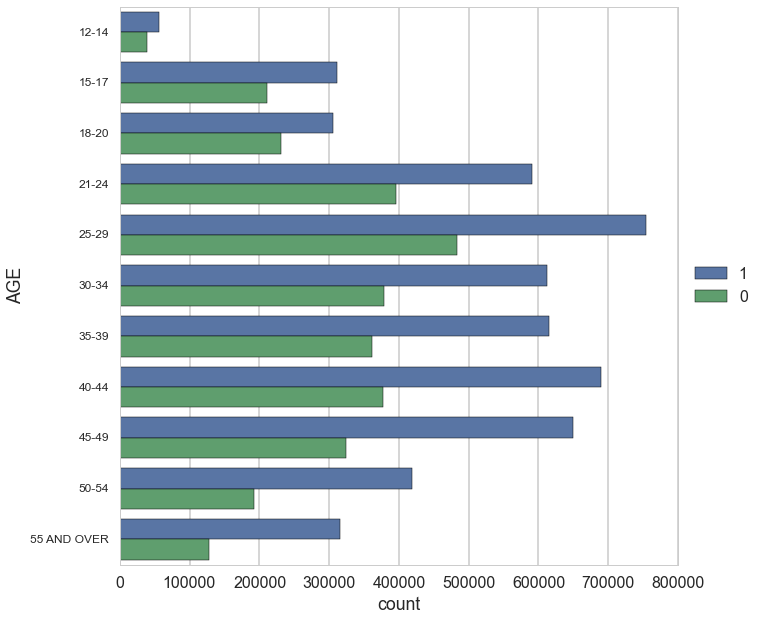

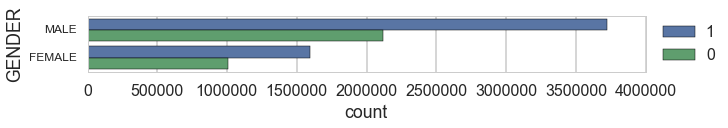

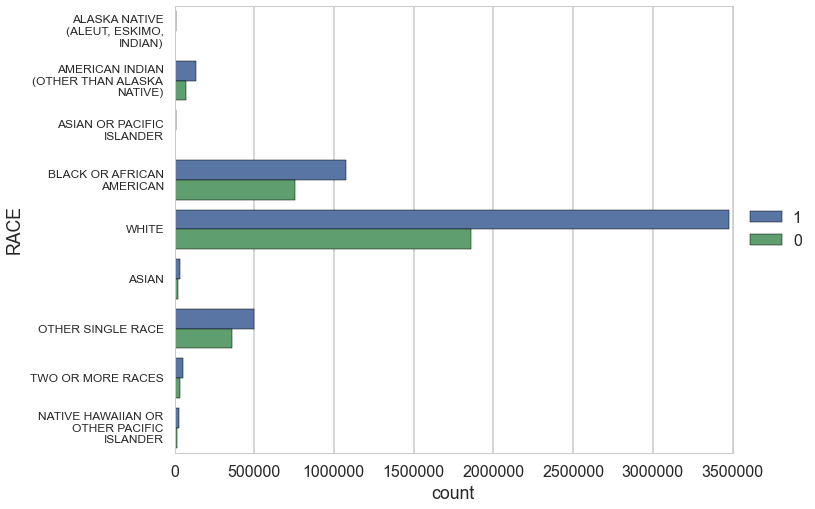

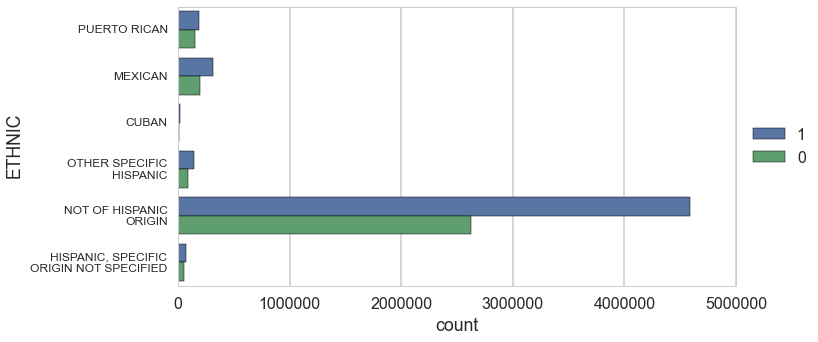

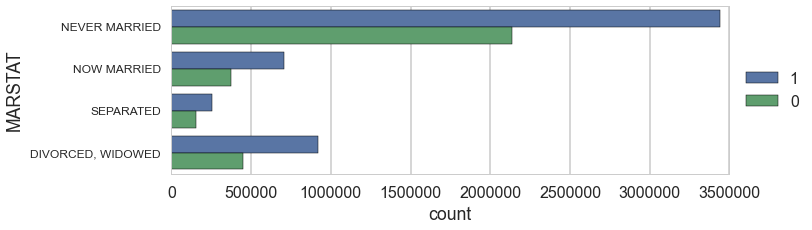

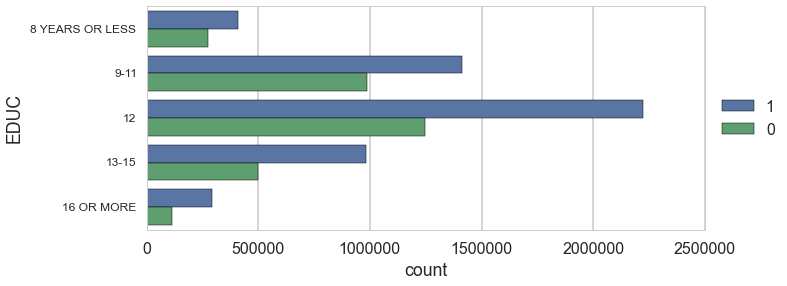

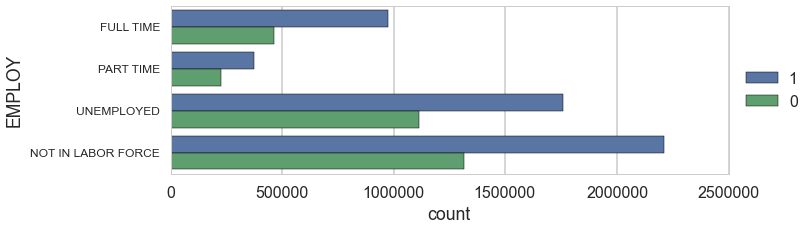

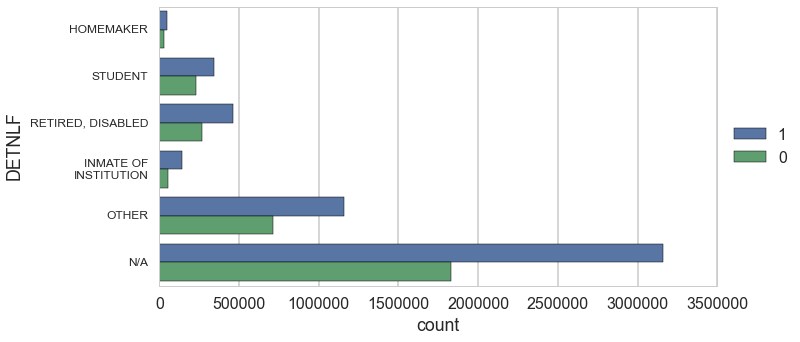

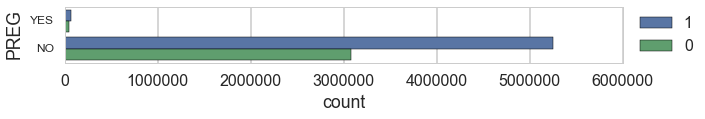

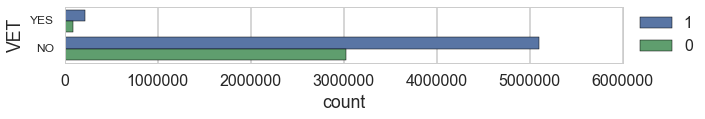

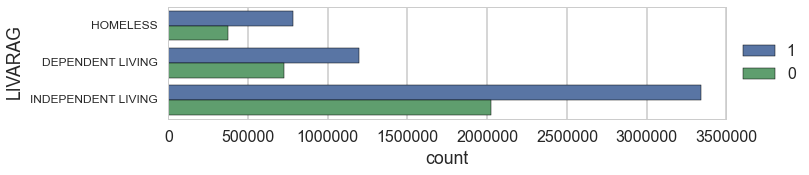

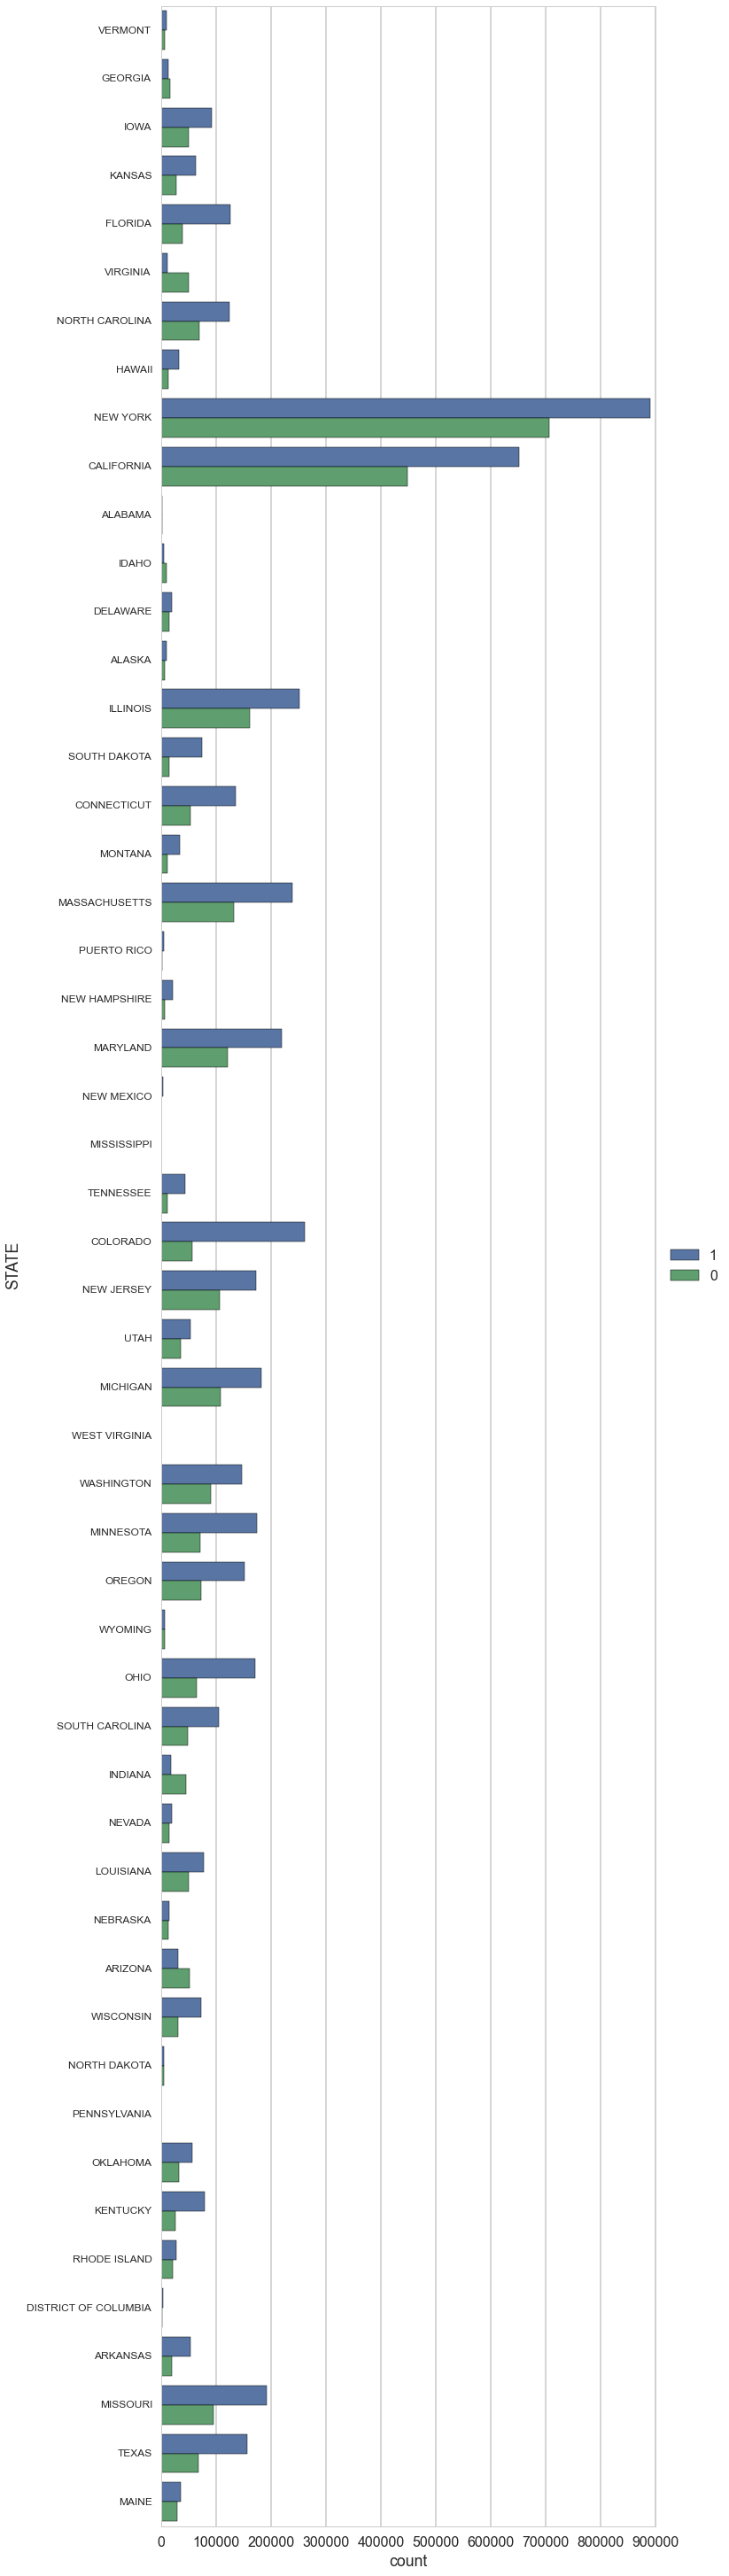

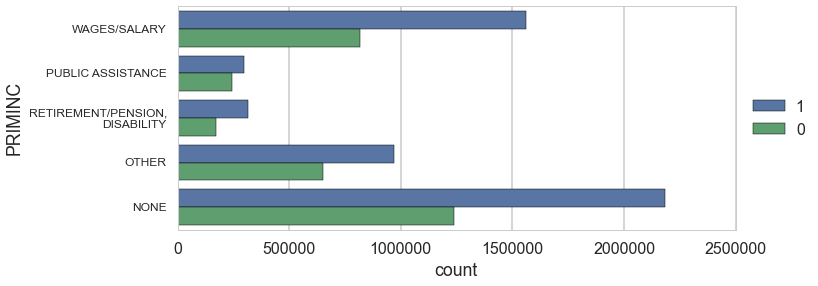

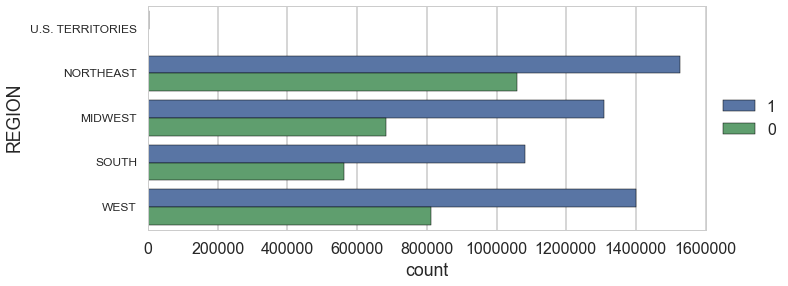

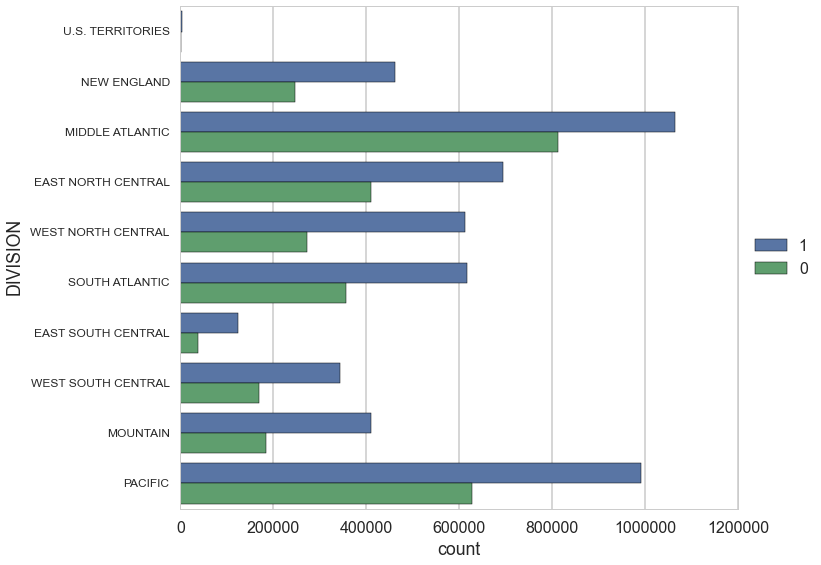

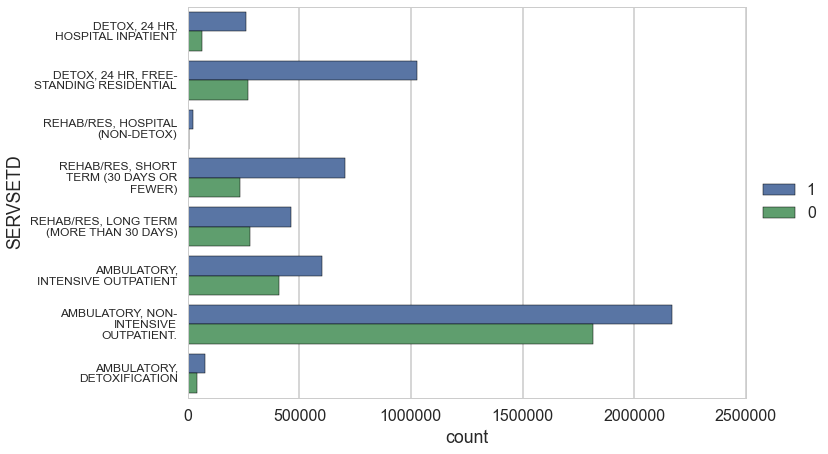

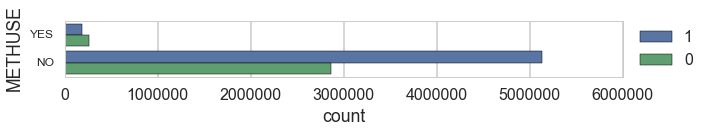

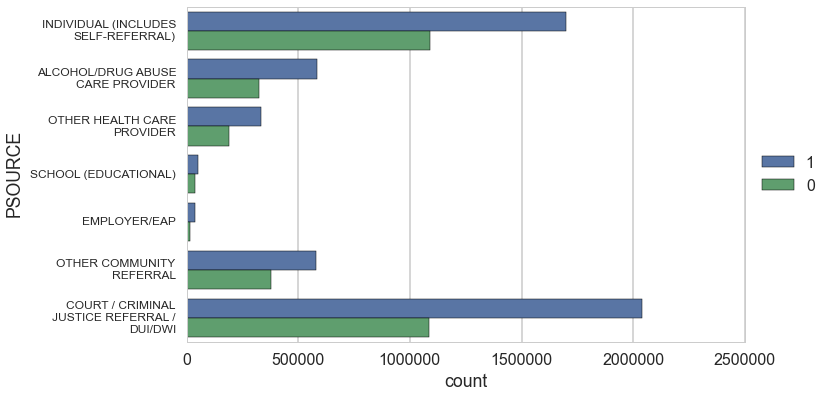

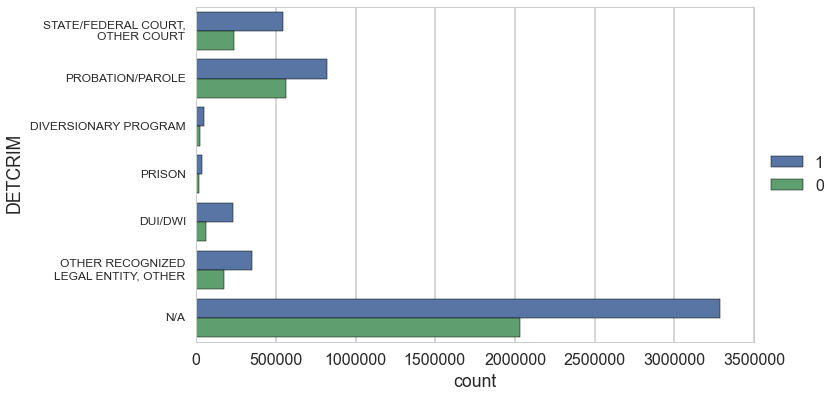

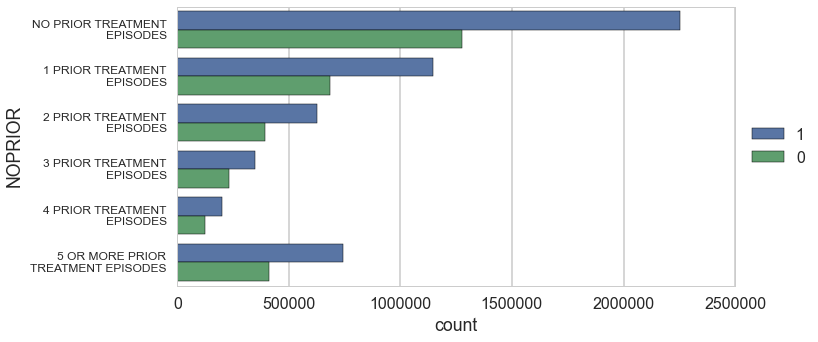

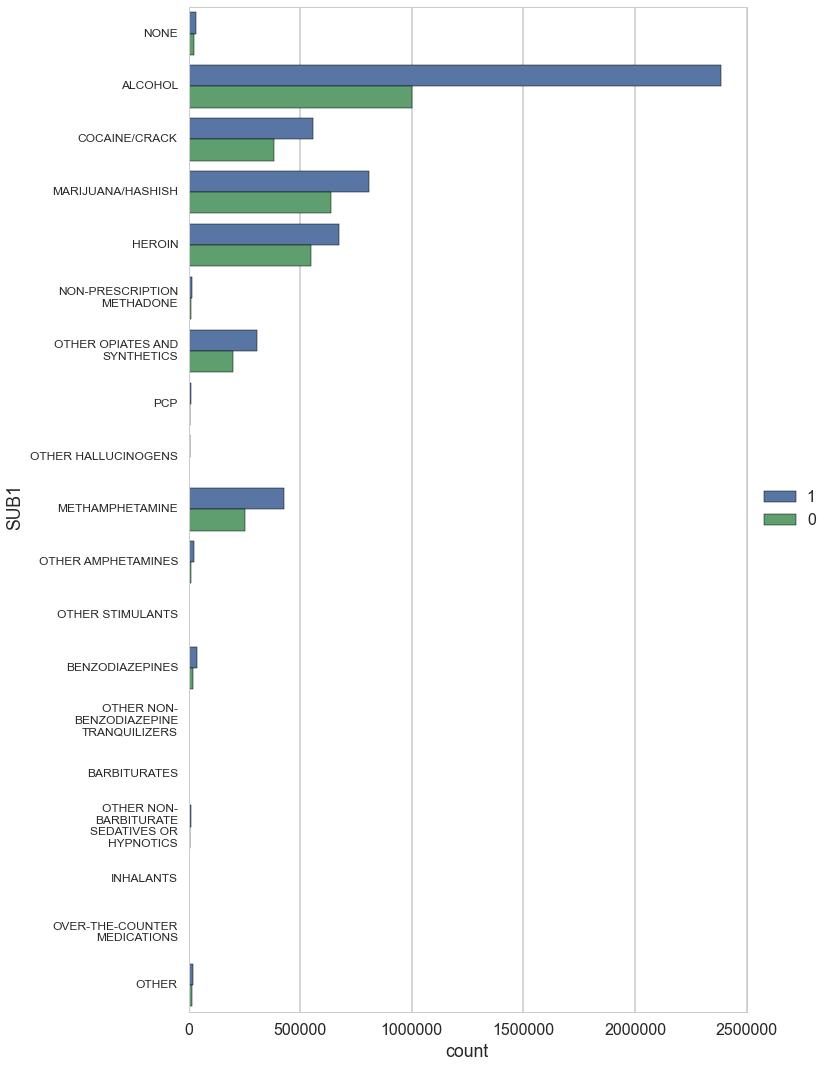

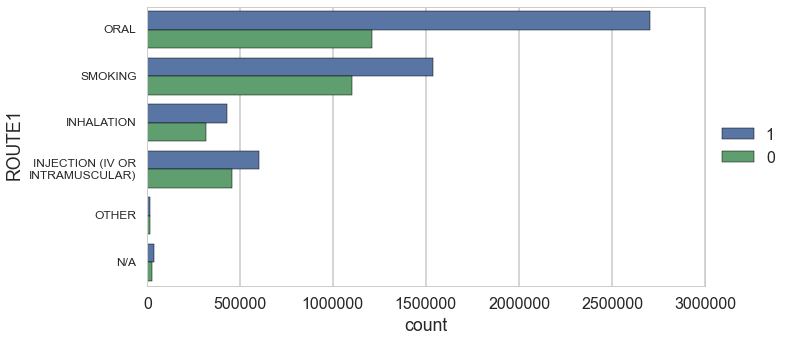

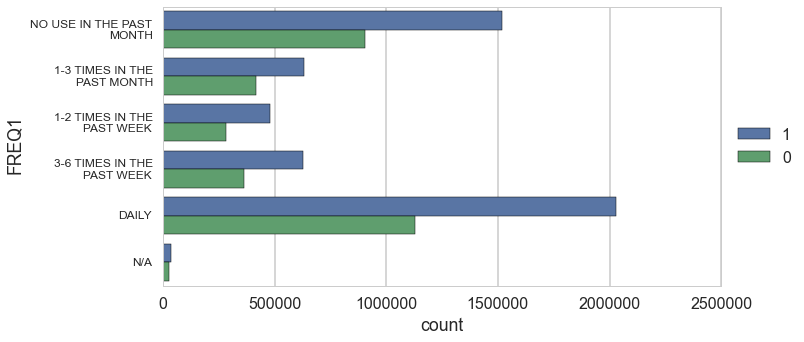

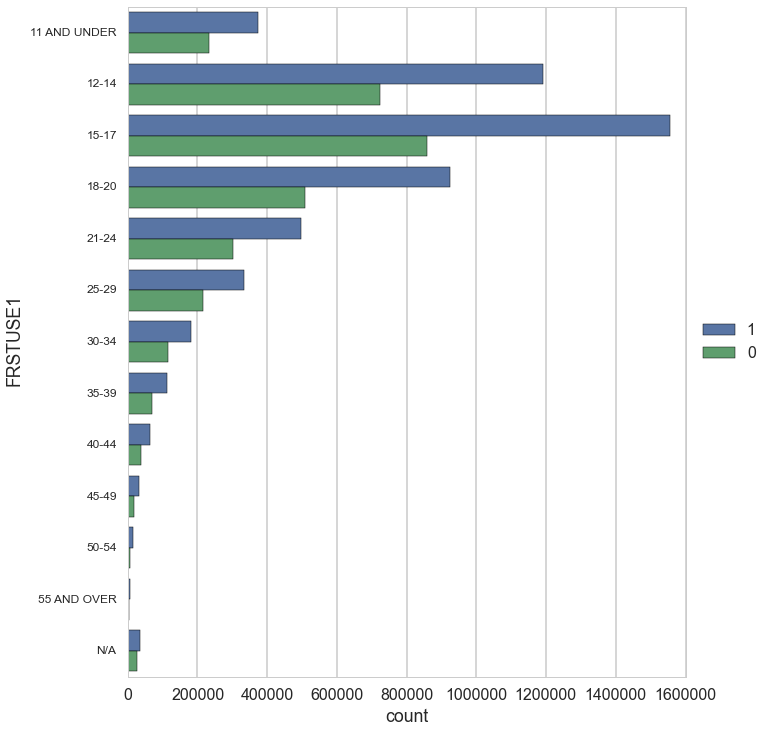

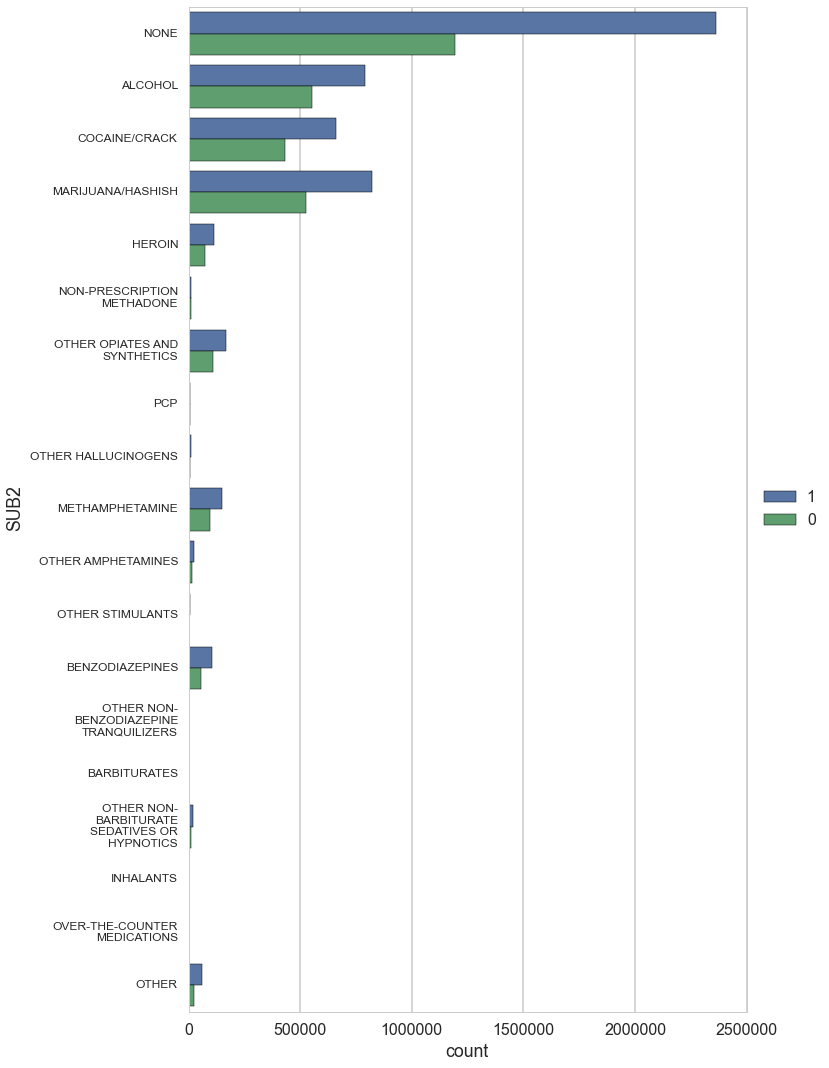

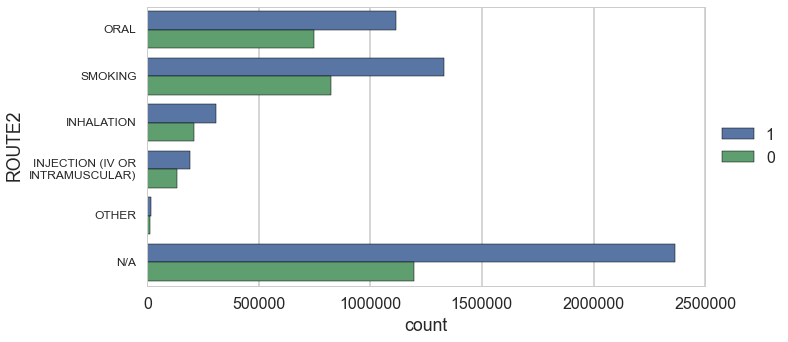

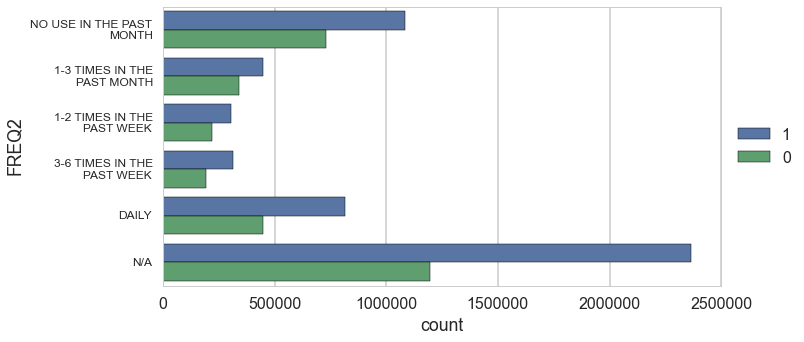

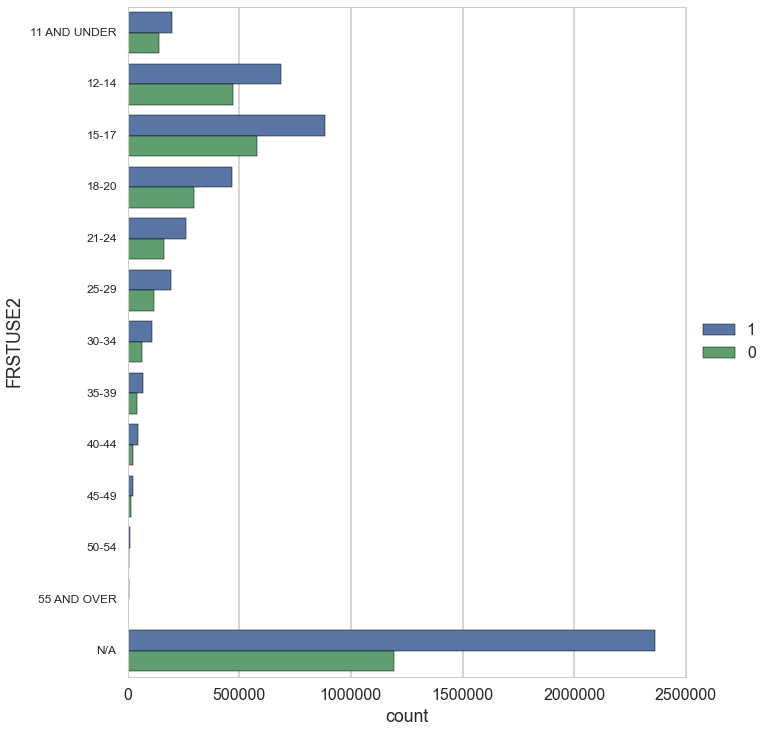

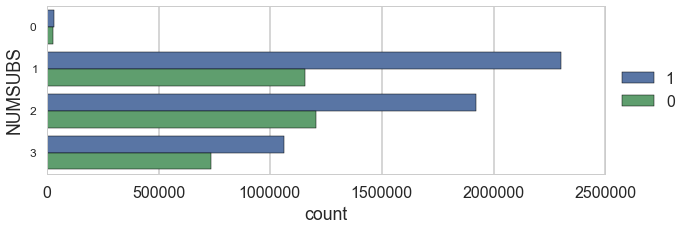

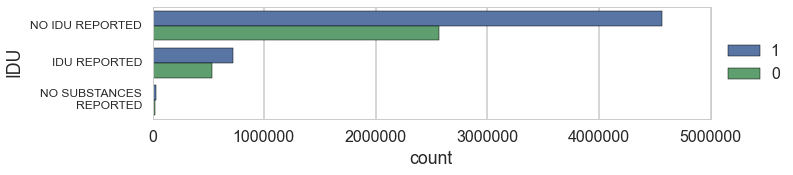

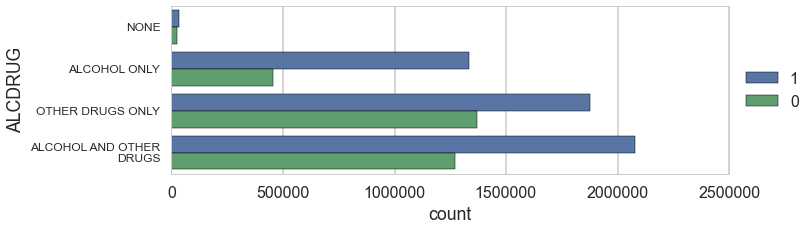

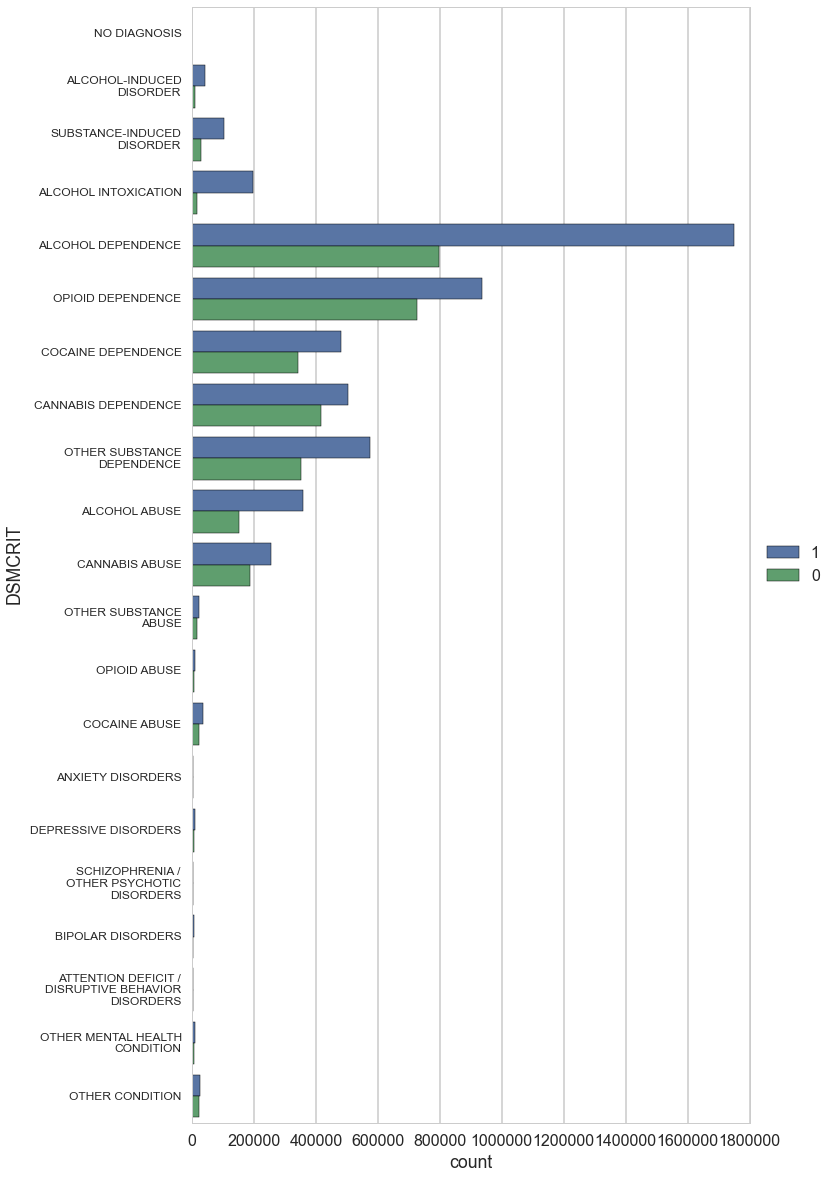

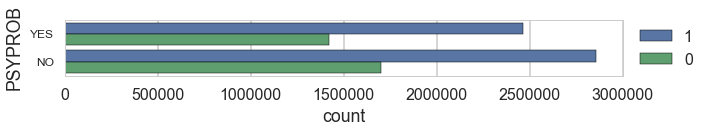

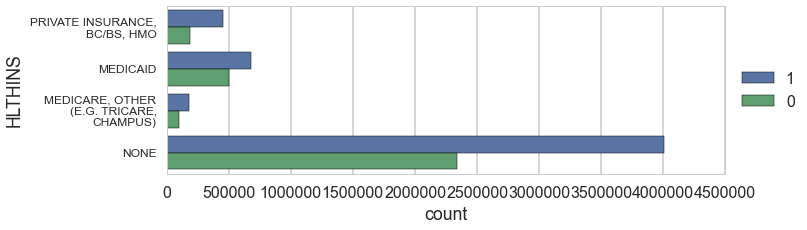

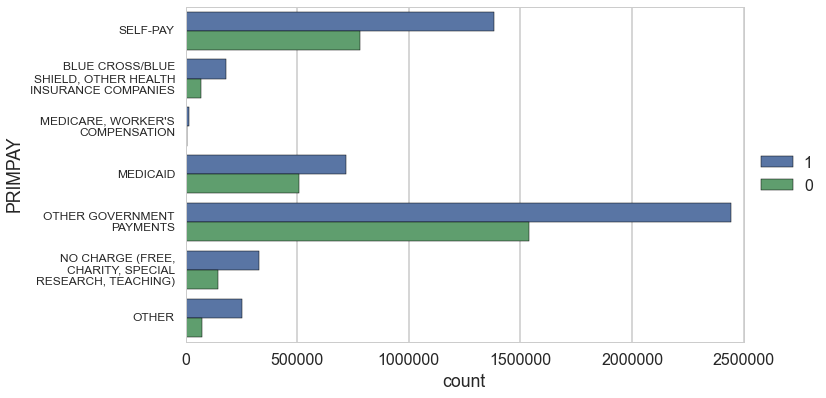

In [288]:
#http://stackoverflow.com/questions/15740682/wrapping-long-y-labels-in-matplotlib-tight-layout-using-setp
from textwrap import wrap

for col in to_plot:
    plt.figure(figsize=(10,(len(var_desc[col].keys()))-1))
    ax=sns.countplot(y=col, hue="RESPONSE", data=df_i, order=var_desc[col].keys())
    labels=var_desc[col].values()
    labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
    ax.set_yticklabels(labels, fontsize=12)
    ax.legend(loc='center right',bbox_to_anchor=(1.15, 0.5))
    plt.show();

In [14]:
positive=df_i[df_i['RESPONSE']>0]
mean_rate=df_i['RESPONSE'].mean()

differences=[]
for col in to_plot:
    splits=positive[col].value_counts()/df_i[col].value_counts()
    for i in (splits.values-mean_rate):
        differences.append(i)

std_dev=np.std(differences)

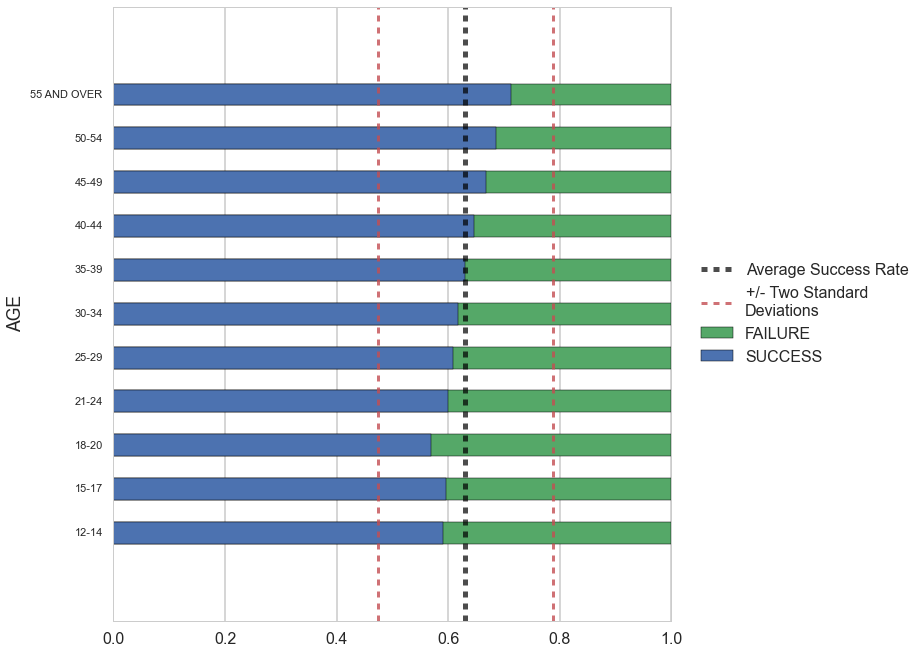

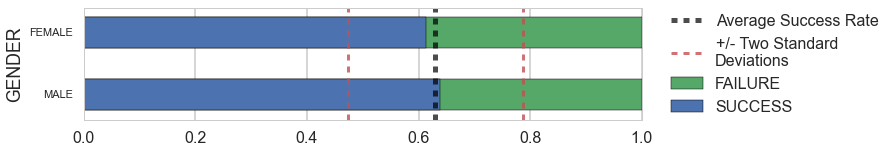

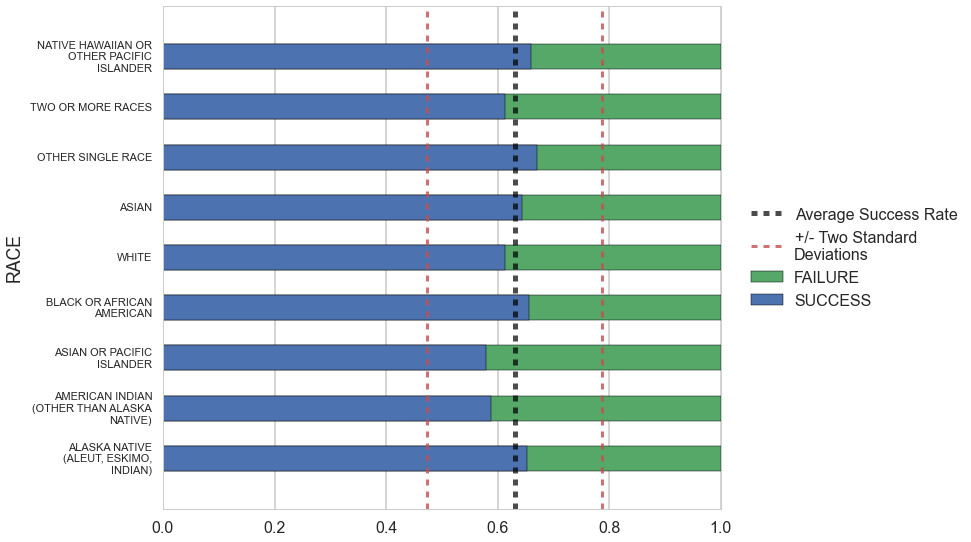

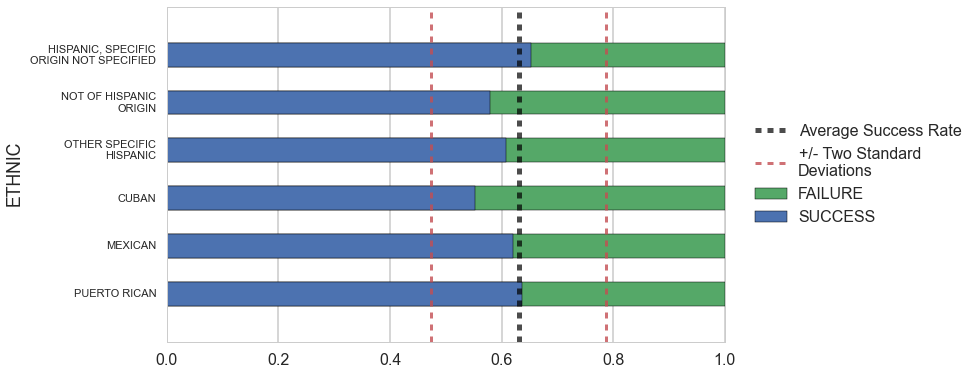

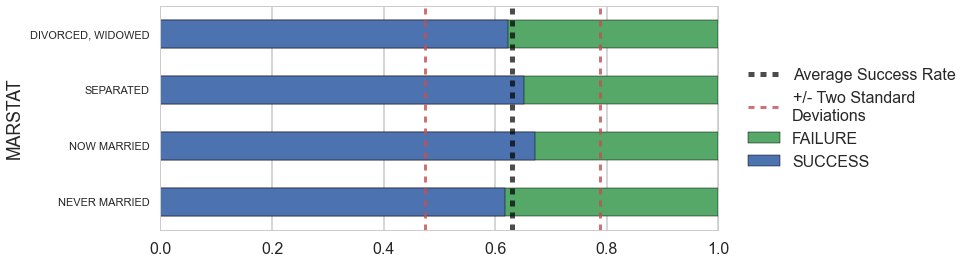

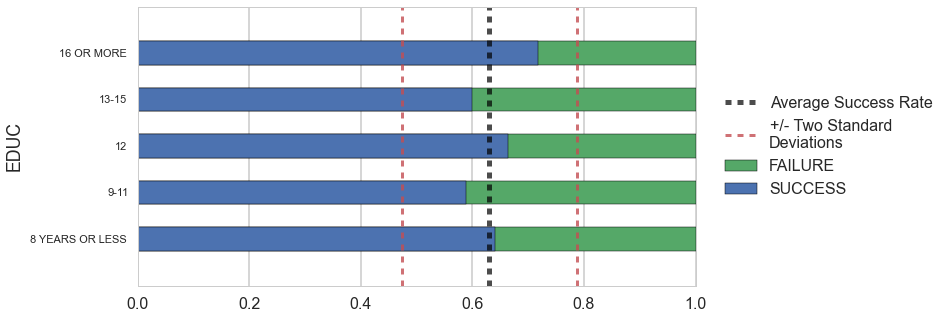

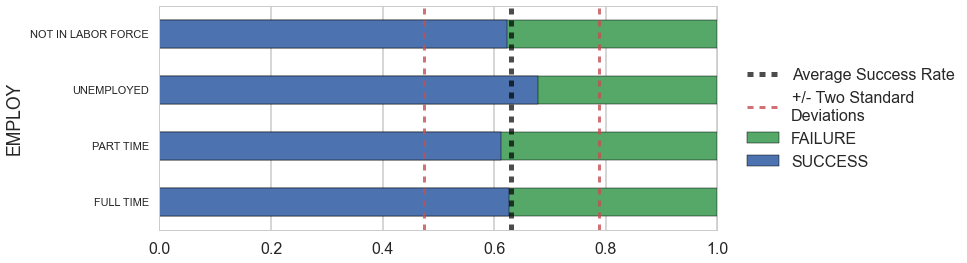

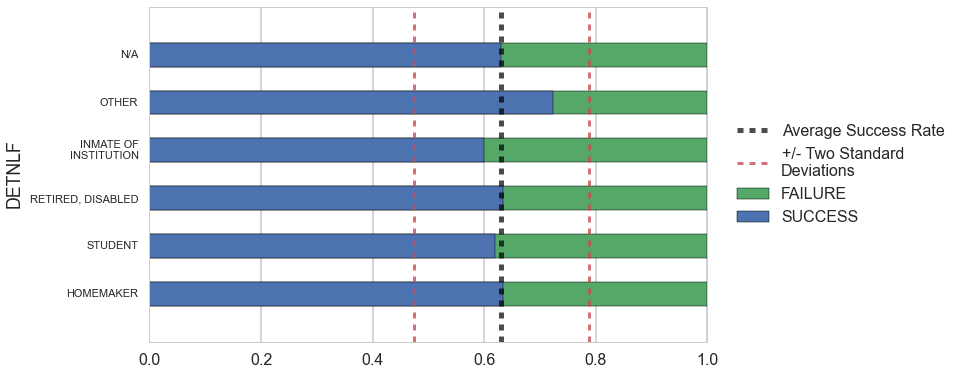

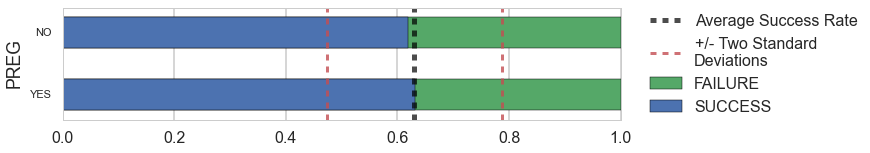

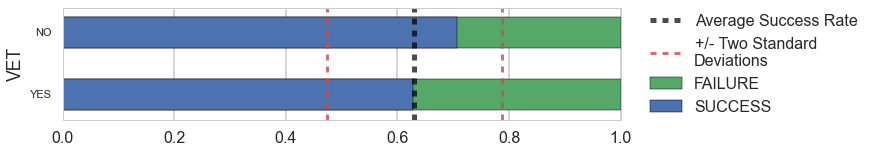

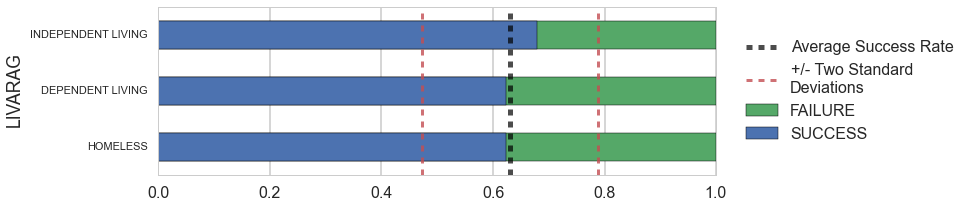

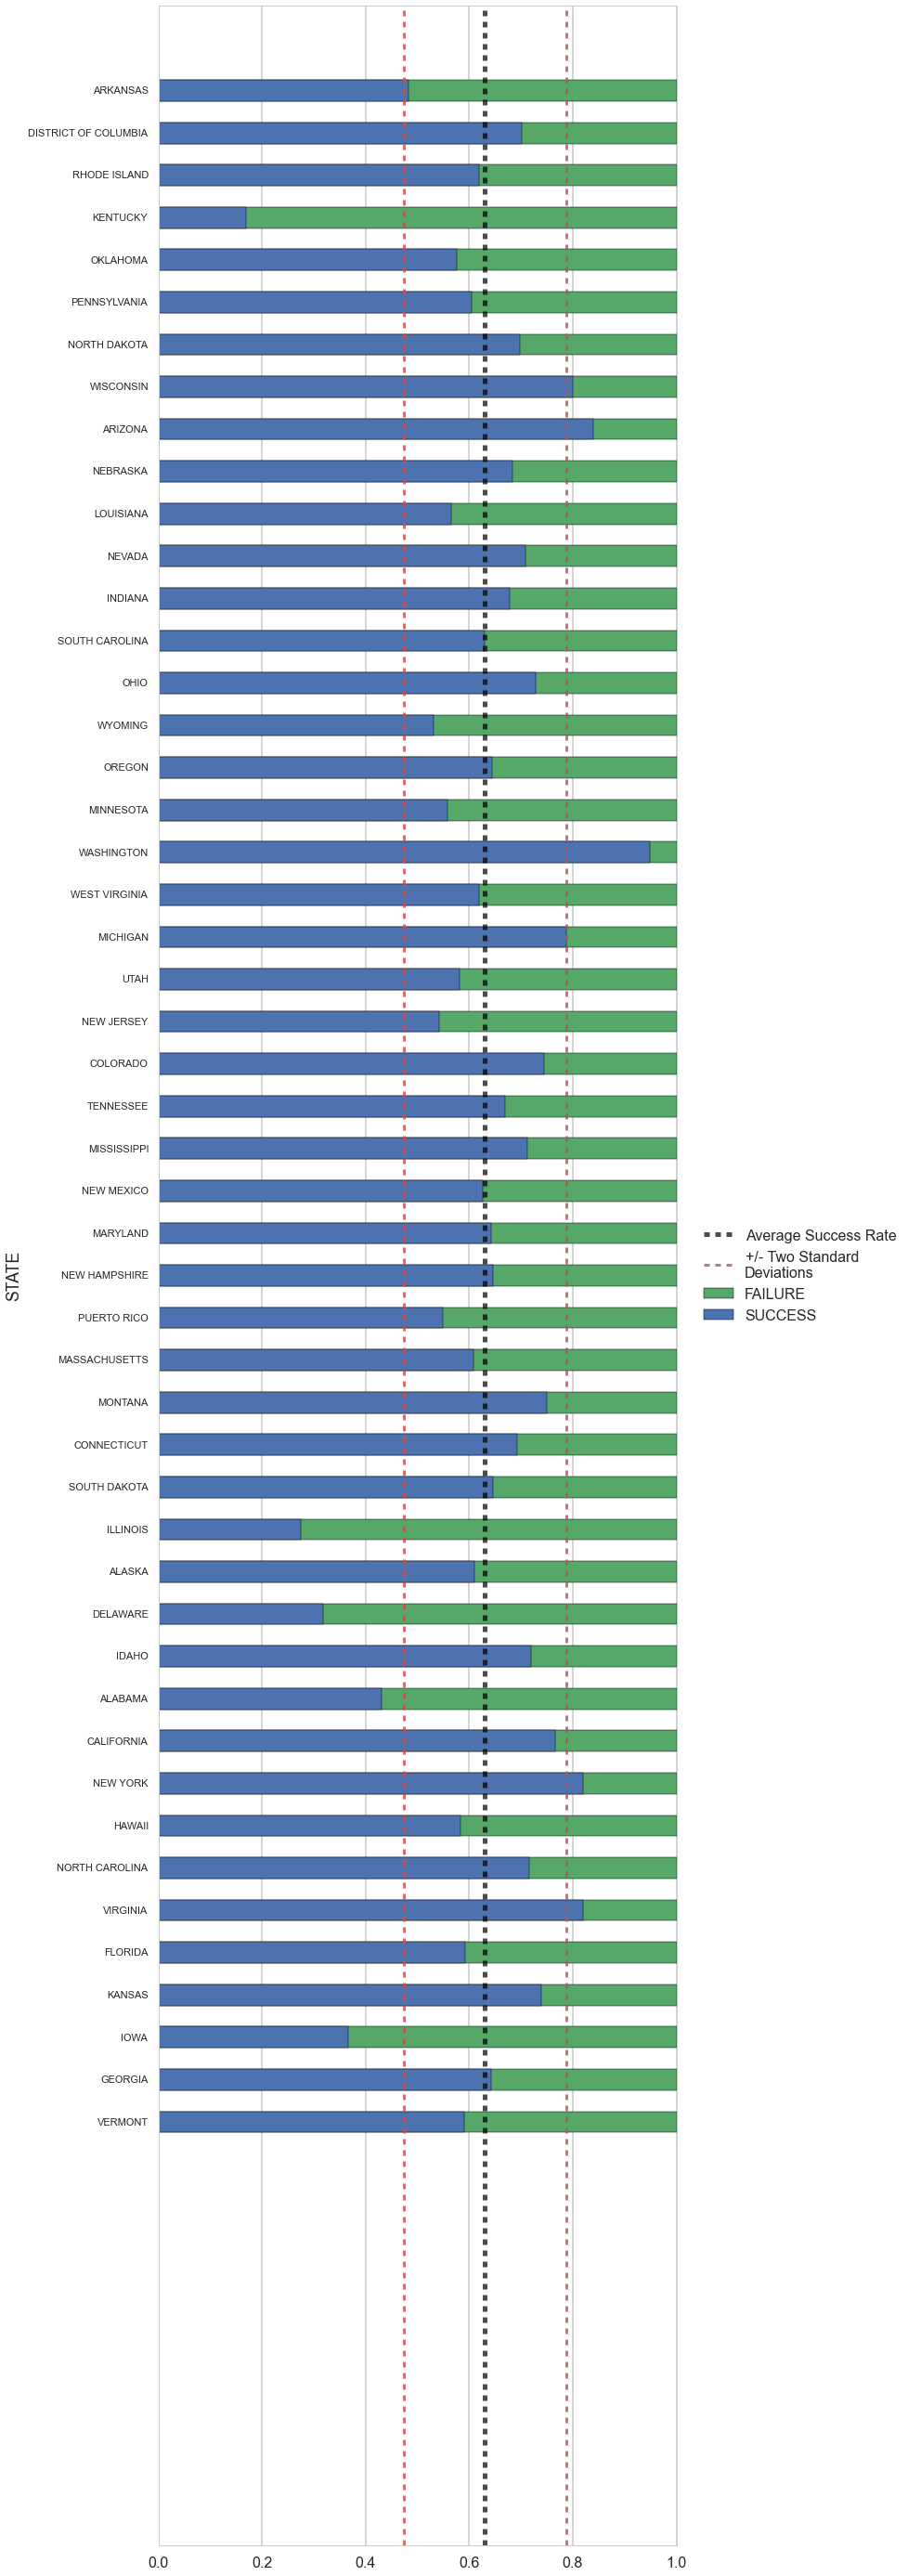

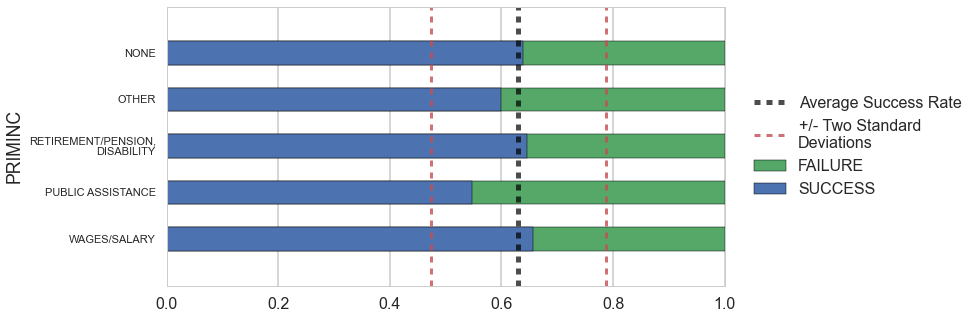

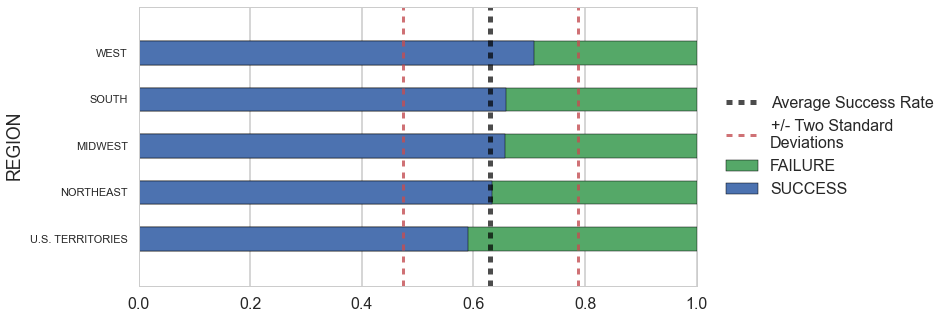

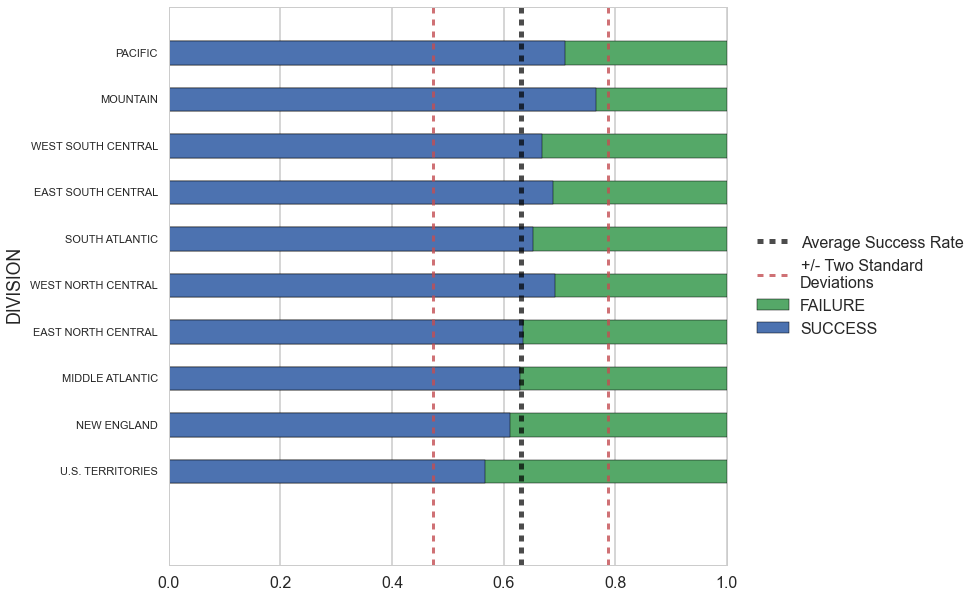

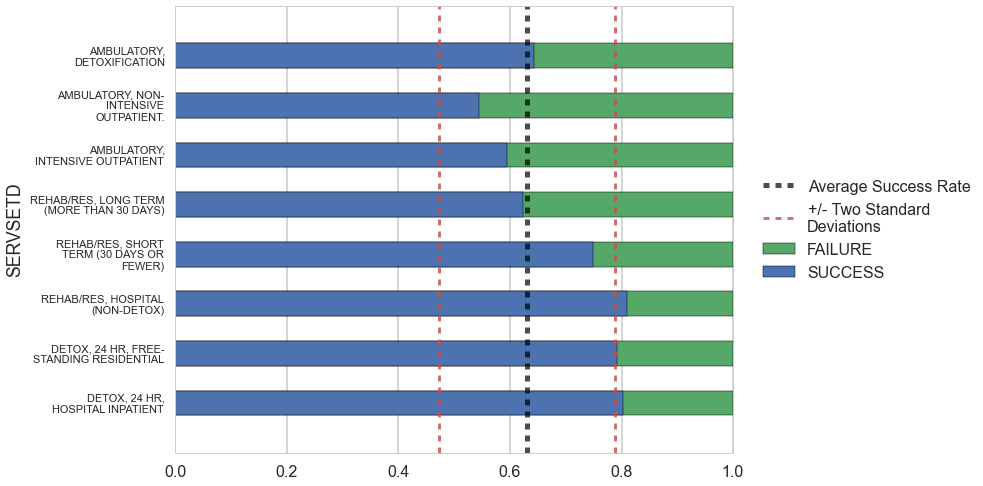

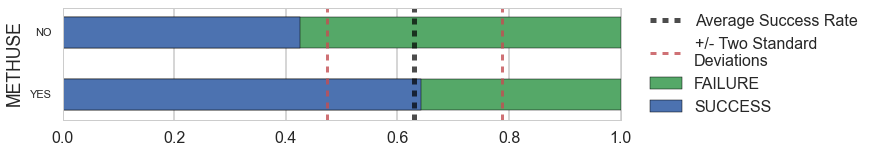

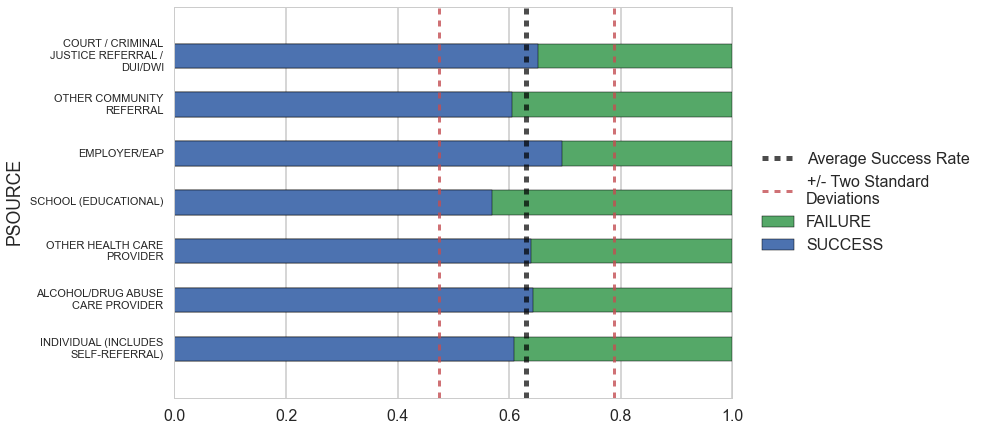

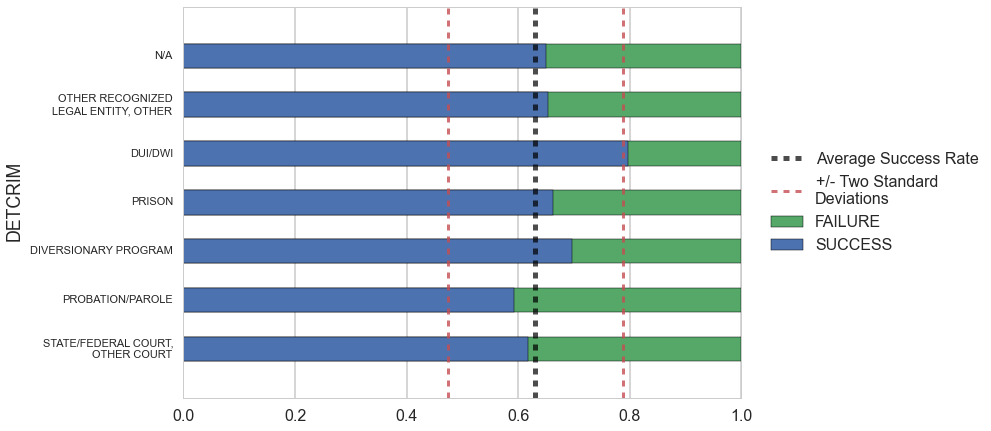

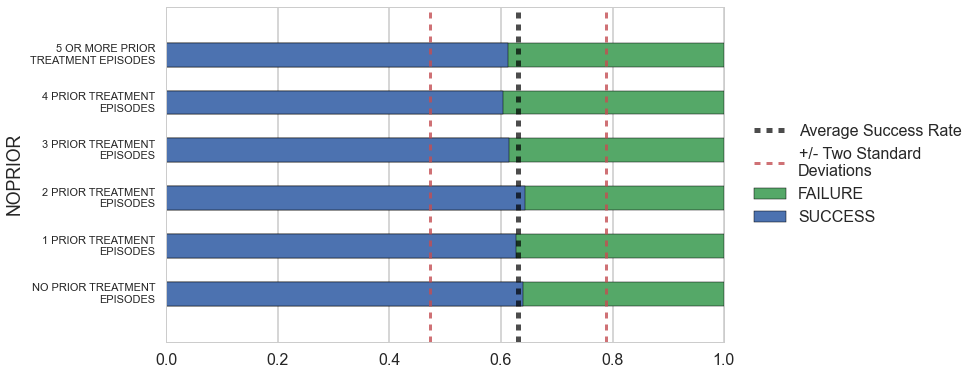

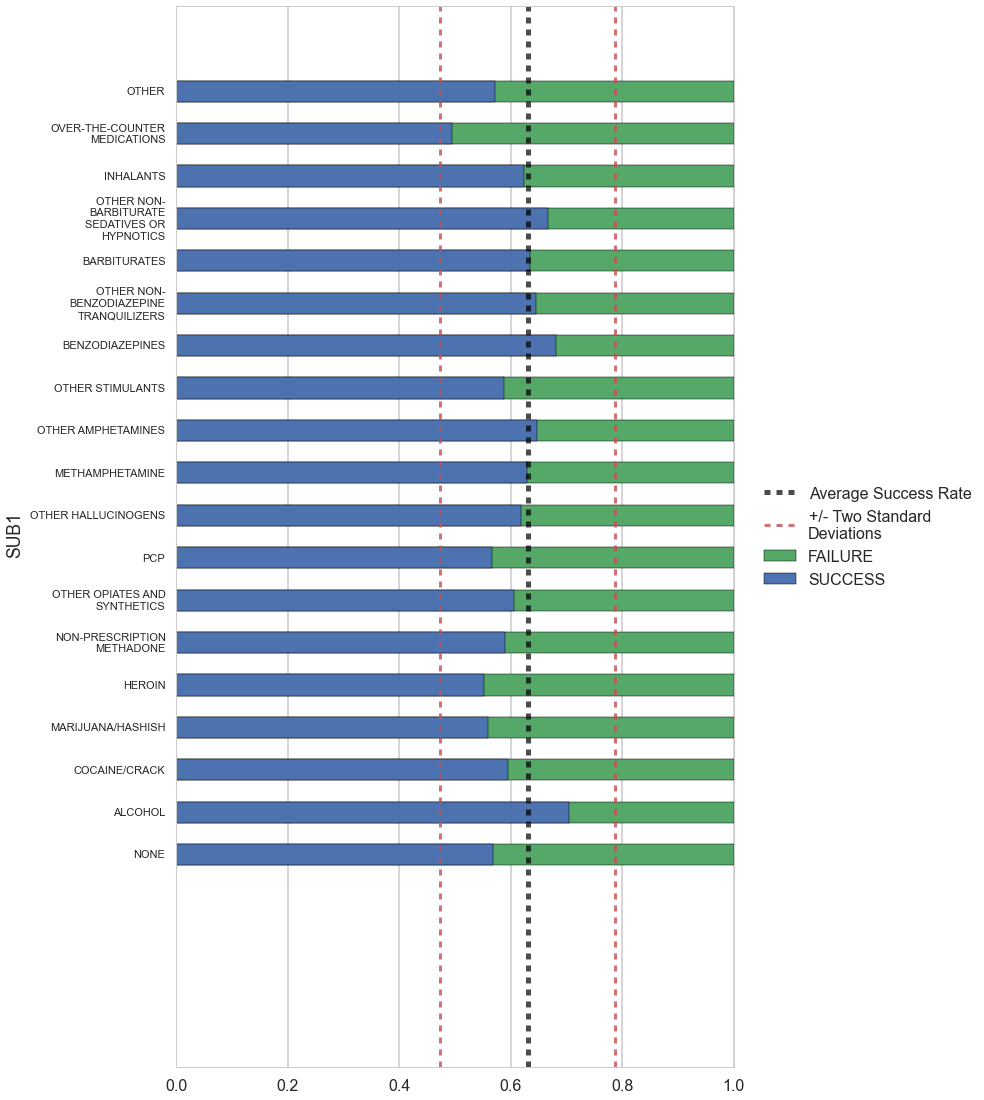

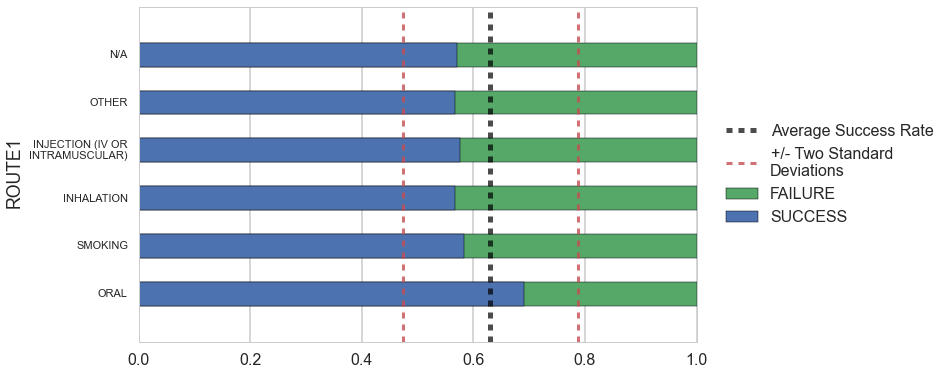

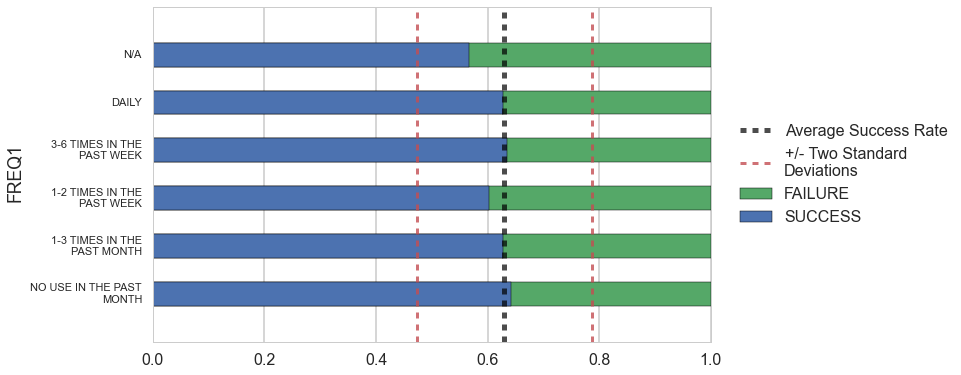

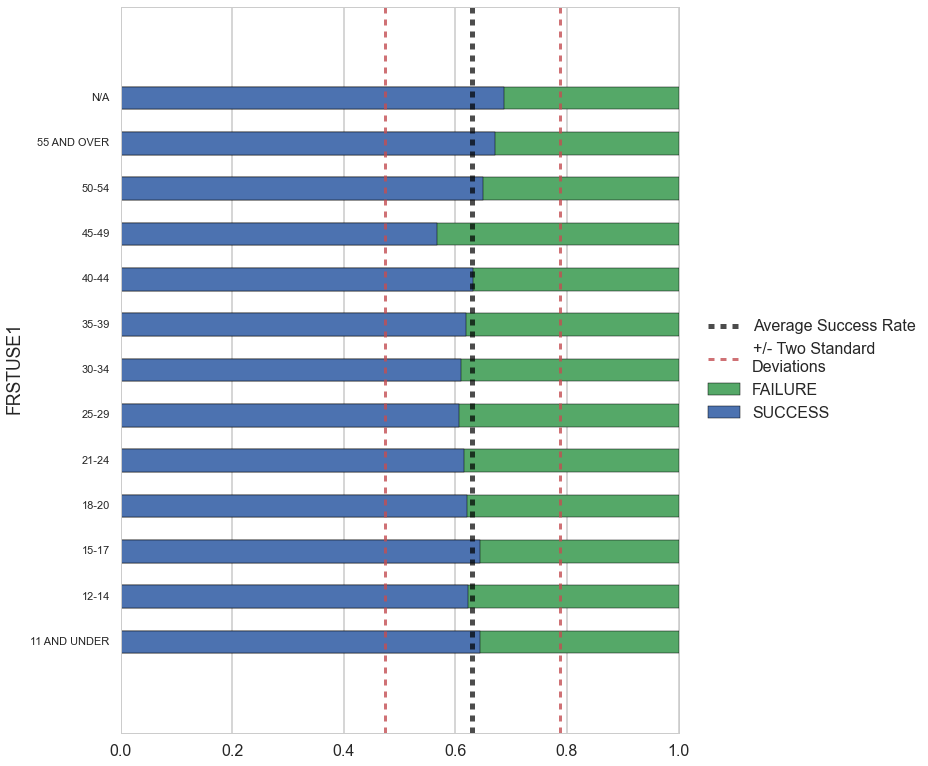

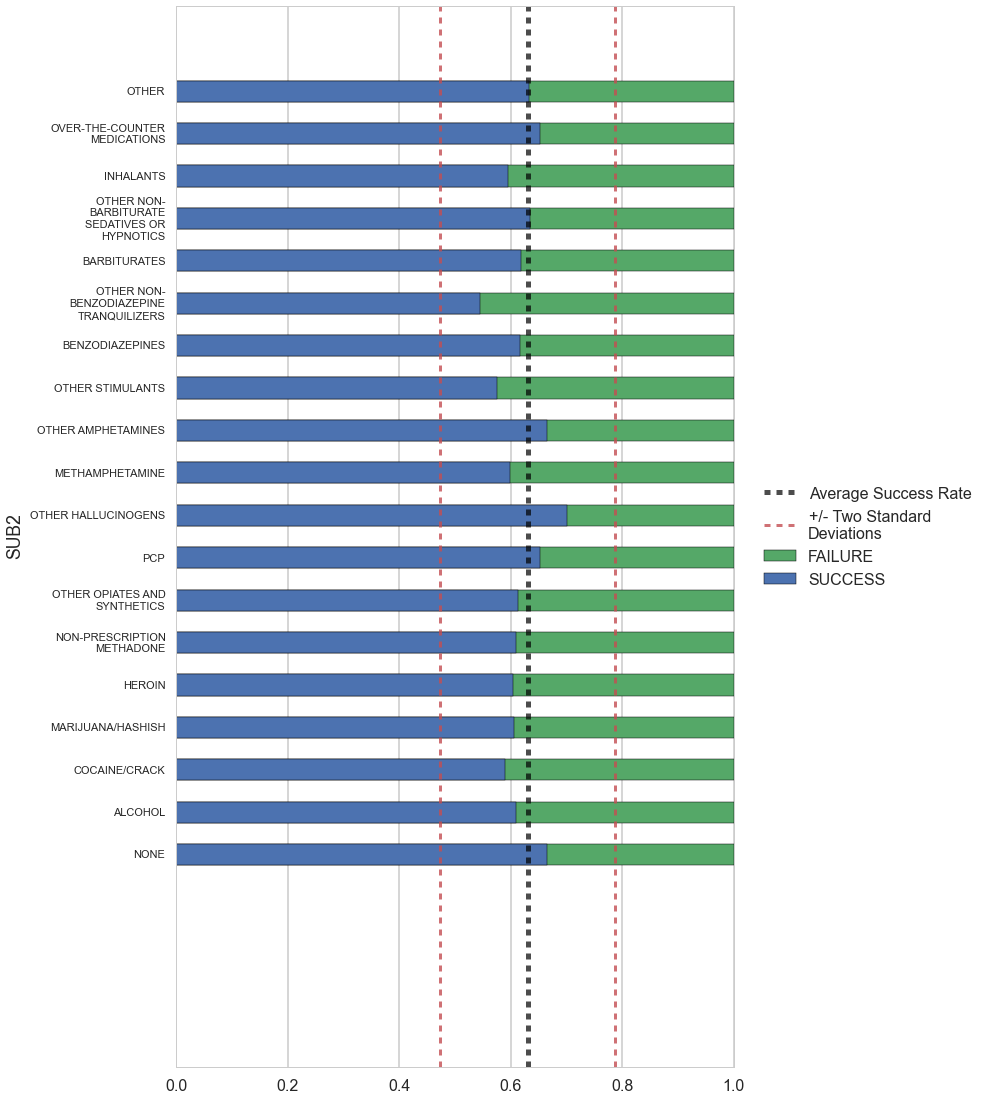

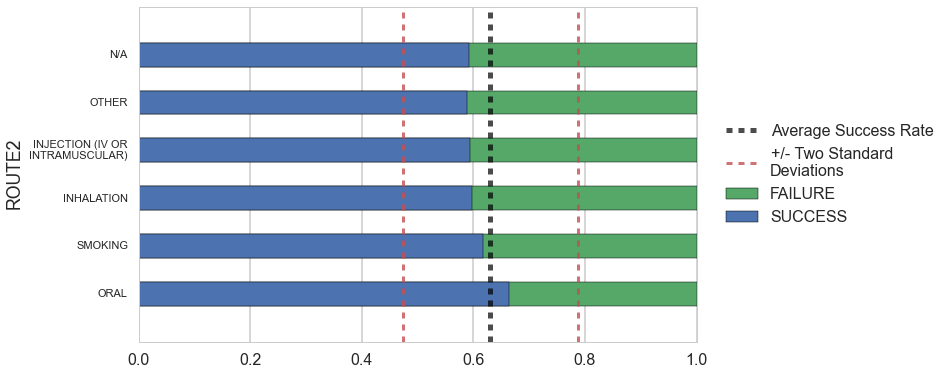

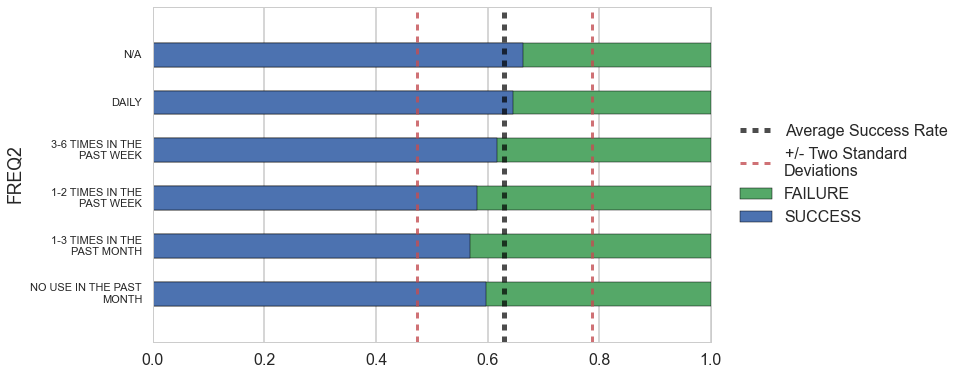

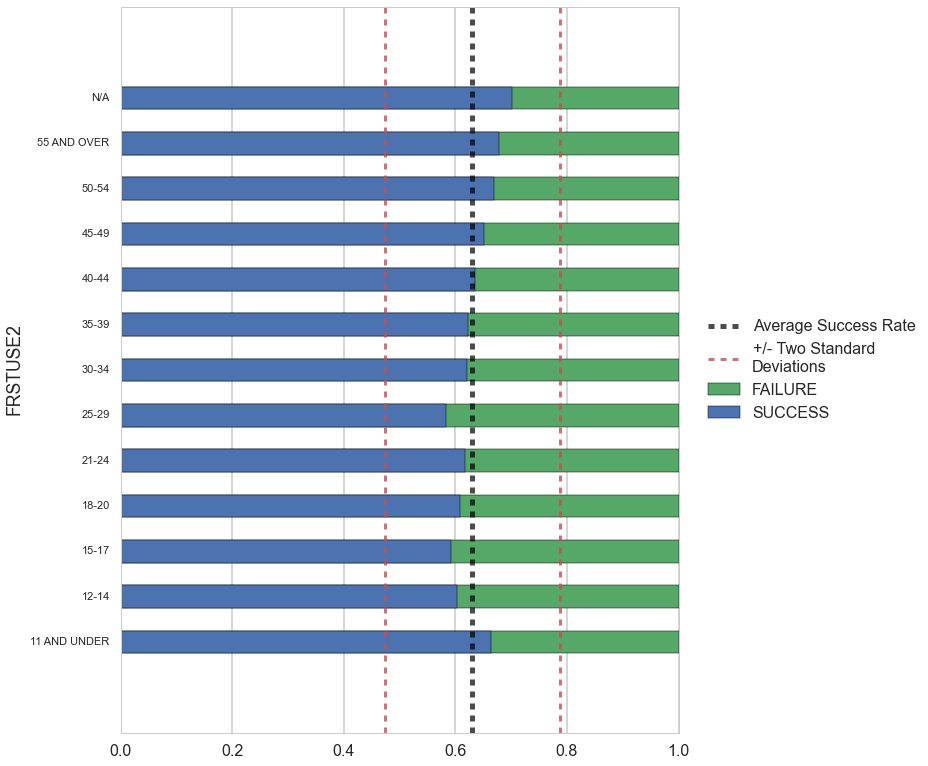

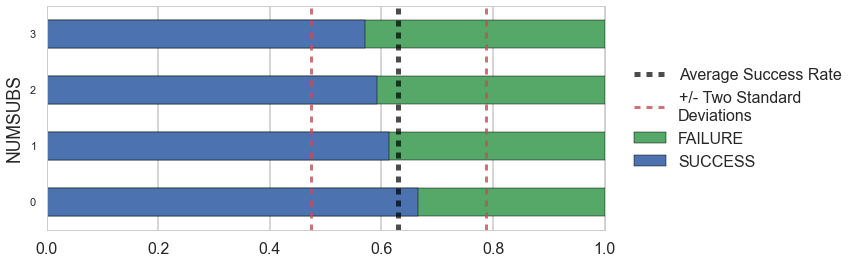

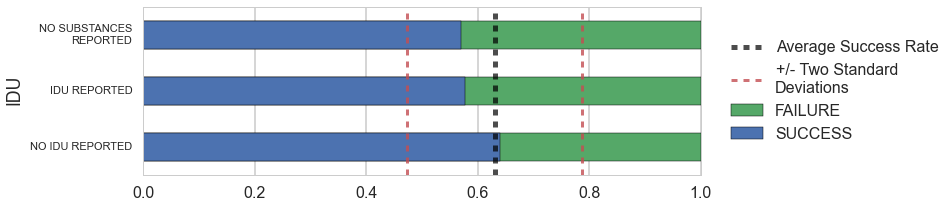

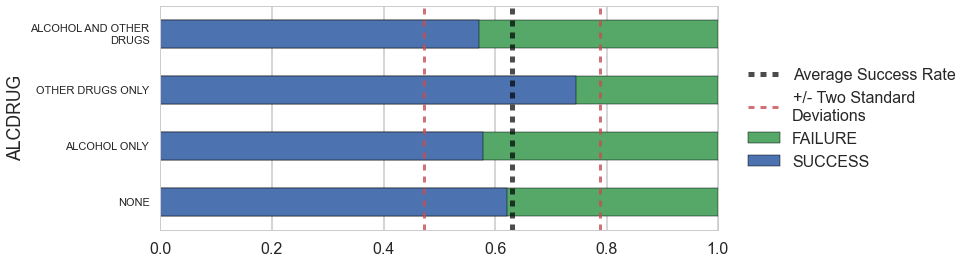

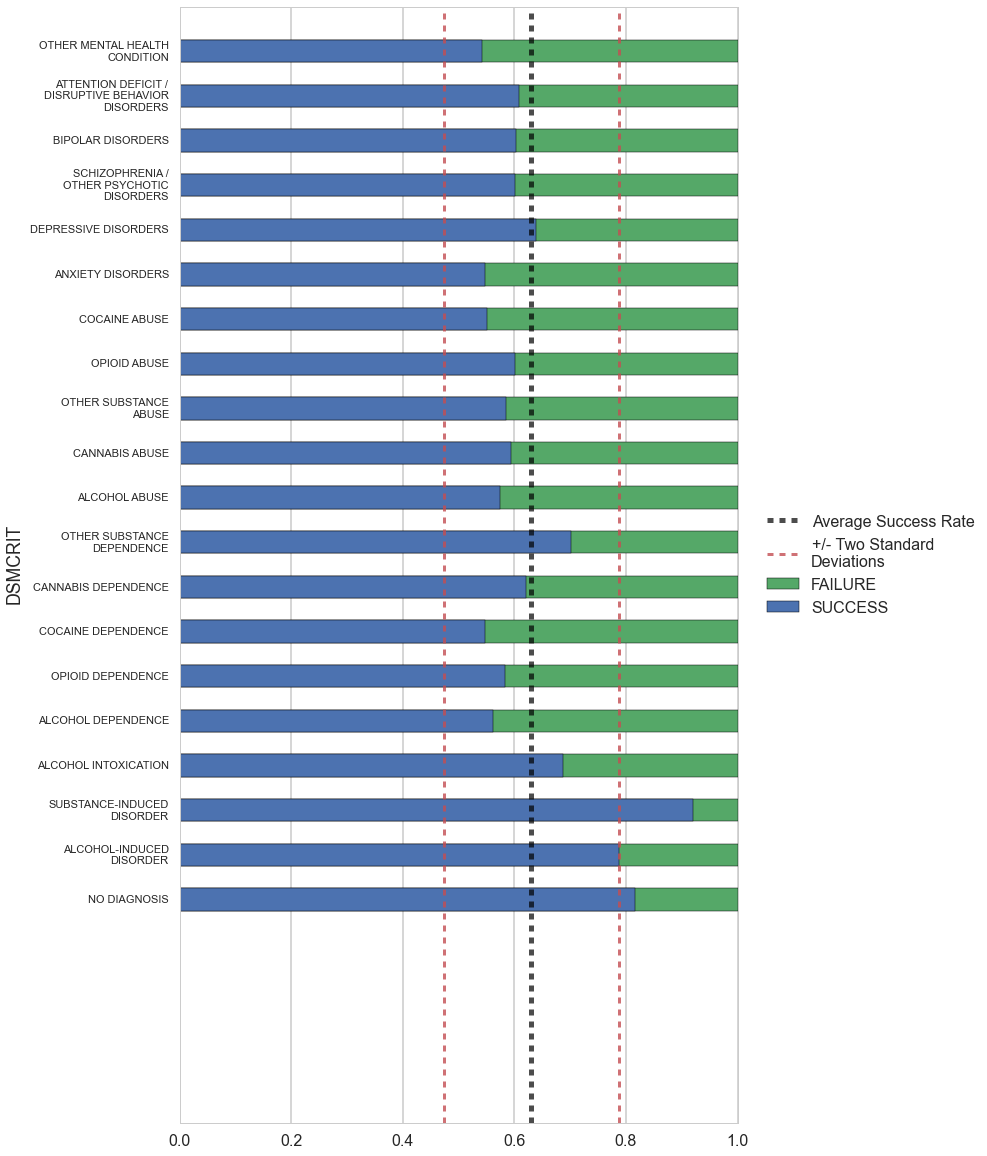

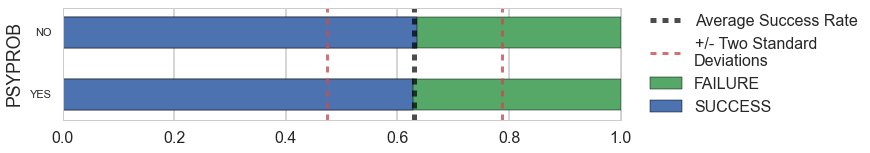

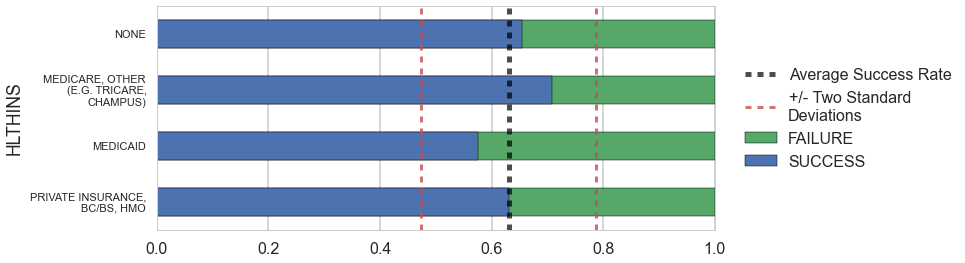

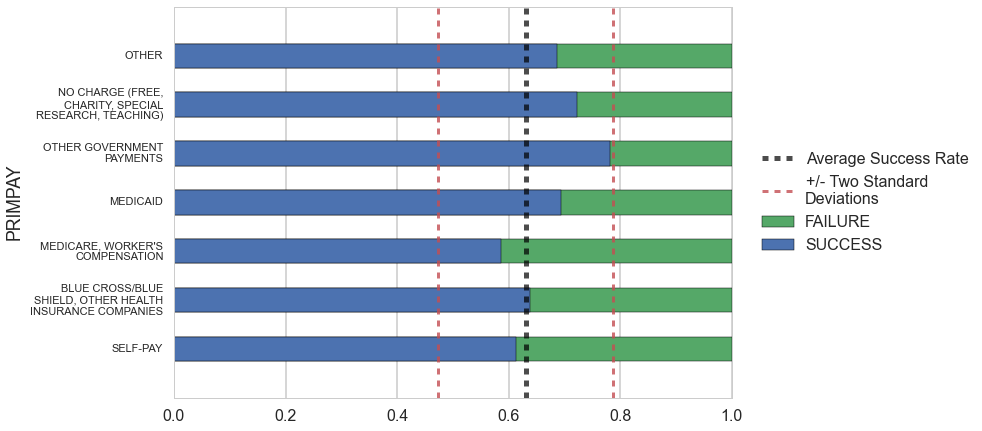

In [290]:
for col in to_plot:
    palette = sns.color_palette()
    splits=positive[col].value_counts()/df_i[col].value_counts()
    plt.figure(figsize=(10,splits.shape[0]))
    plt.barh(range(len(splits.index)), np.ones(len(splits.index)), 
             align='center', color=palette[1], label="FAILURE", height=0.5)
    plt.barh(range(len(splits.index)), splits.values, 
             align='center', color=palette[0], label="SUCCESS", height=0.5)
    plt.ylabel(col)
    plt.axvline(x=mean_rate, ymin=0, ymax=100, linewidth=5, alpha=0.7,
               linestyle = "--", label="Average Success Rate", color='k')
    plt.axvline(x=mean_rate-2*std_dev, ymin=0, ymax=100, linewidth=3, alpha=0.8,
               linestyle = "--", label="+/- Two Standard \nDeviations", color=palette[2])
    plt.axvline(x=mean_rate+2*std_dev, ymin=0, ymax=100, linewidth=3, alpha=0.8,
               linestyle = "--", color=palette[2])
    labels=var_desc[col].values()
    labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
    plt.yticks(range(len(splits.index)), labels, fontsize=11)
    plt.legend(loc='center right',bbox_to_anchor=(1.45, 0.5))
    plt.show();

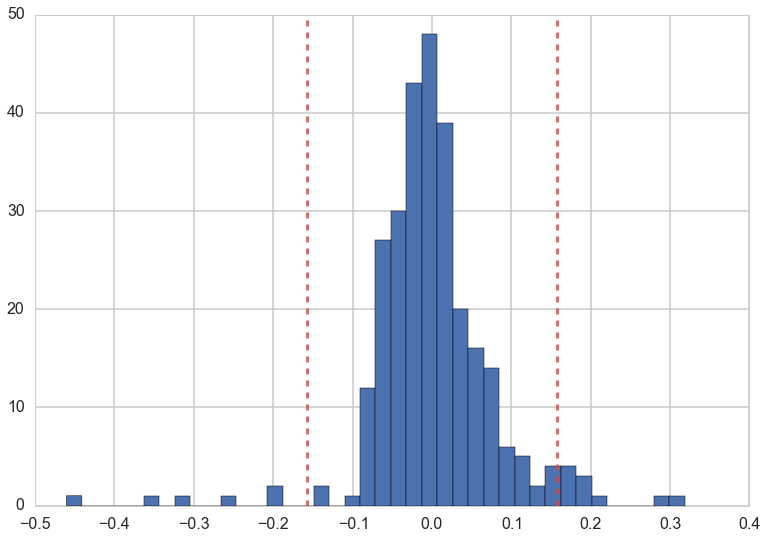

In [291]:
plt.hist(differences, bins=40)
plt.axvline(x=-2*std_dev, ymin=0, ymax=100, linewidth=3, alpha=0.8,
           linestyle = "--", label="+/- Two Standard \nDeviations", color=palette[2])
plt.axvline(x=2*std_dev, ymin=0, ymax=100, linewidth=3, alpha=0.8,
           linestyle = "--", color=palette[2]);

In [25]:
def interactions(df, cols, var_desc, response='RESPONSE'):
    compare=cols
    int_list=[]
    for var in cols:
        print "VAR1: "+var
        compare=compare[1:]
        for var2 in compare: 
            for p in var_desc[var].keys():
                for q in var_desc[var2].keys():
                    iter_mask=(df[var]==p) & (df[var2]==q)
                    int_mean=df[iter_mask][response].mean()
                    int_count=df[iter_mask][response].count()
                    int_list.append([var, var2, p, q, int_mean, int_count])
            #print "FINISHED VAR2 "+ var2
            
    int_df=pd.DataFrame(data=int_list, columns=['VAR1','VAR2','VAL1','VAL2', 'MEAN', 'COUNT'])
    
    return int_df

In [26]:
cols=['AGE', 'GENDER','RACE','MARSTAT','EDUC','EMPLOY','PREG','VET','LIVARAG','PRIMINC',
      'DIVISION','SERVSETD','METHUSE','PSOURCE','NOPRIOR','SUB1','ROUTE1','FREQ1',
      'FRSTUSE1','NUMSUBS','IDU','ALCDRUG','PSYPROB','HLTHINS','PRIMPAY']


In [27]:
int_df=interactions(df_i[tr_mask], cols, var_desc)
int_df.to_csv('tempdata/interactions.csv')

VAR1: AGE
VAR1: GENDER
VAR1: RACE
VAR1: MARSTAT
VAR1: EDUC
VAR1: EMPLOY
VAR1: PREG
VAR1: VET
VAR1: LIVARAG
VAR1: PRIMINC
VAR1: DIVISION
VAR1: SERVSETD
VAR1: METHUSE
VAR1: PSOURCE
VAR1: NOPRIOR
VAR1: SUB1
VAR1: ROUTE1
VAR1: FREQ1
VAR1: FRSTUSE1
VAR1: NUMSUBS
VAR1: IDU
VAR1: ALCDRUG
VAR1: PSYPROB
VAR1: HLTHINS
VAR1: PRIMPAY


In [33]:
var_desc['AGE'][2]

u'12-14'

In [47]:
int_df['VAR1_DESC']=[var_desc[i][j] for i,j in zip(int_df.VAR1, int_df.VAL1)]
int_df['VAR2_DESC']=[var_desc[i][j] for i,j in zip(int_df.VAR2, int_df.VAL2)]

In [49]:
total_mean=df_i[tr_mask].RESPONSE.mean()

In [52]:
int_df['DIFF']=[i-total_mean for i in int_df.MEAN]

In [58]:
int_df.sort(columns='DIFF').head(10)

,VAR1,VAR2,VAL1,VAL2,MEAN,COUNT,VAR1_DESC,VAR2_DESC,DIFF
2348,RACE,SUB1,3,12,0.000000,1,ASIAN OR PACIFIC ISLANDER,OTHER STIMULANTS,-0.630327
1102,AGE,FRSTUSE1,2,3,0.000000,1,12-14,15-17,-0.630327
2310,RACE,SUB1,1,12,0.000000,1,"ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)",OTHER STIMULANTS,-0.630327
2082,RACE,DIVISION,23,0,0.000000,1,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,U.S. TERRITORIES,-0.630327
2304,RACE,SUB1,1,6,0.166667,6,"ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)",NON-PRESCRIPTION METHADONE,-0.463661
7545,PSOURCE,SUB1,4,12,0.211823,203,SCHOOL (EDUCATIONAL),OTHER STIMULANTS,-0.418505
5779,DIVISION,METHUSE,0,1,0.248843,864,U.S. TERRITORIES,YES,-0.381485
770,AGE,SUB1,2,12,0.252252,222,12-14,OTHER STIMULANTS,-0.378075
5799,DIVISION,PSOURCE,0,1,0.277717,911,U.S. TERRITORIES,INDIVIDUAL (INCLUDES SELF-REFERRAL),-0.352611
5706,DIVISION,SERVSETD,0,8,0.294118,34,U.S. TERRITORIES,"AMBULATORY, DETOXIFICATION",-0.336210


In [63]:
#BASED ON CODE FROM:https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-
#Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Chapter4.ipynb
def intervals(mu, count):
    a = 1. + mu*count
    b = 1. + (1-mu)*count
    std_err = 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1.)))
    return std_err

#print "Approximate lower bounds:"
int_df['STD_ERROR'] = intervals(int_df['MEAN'], int_df['COUNT'])
#lb = posterior_mean - std_err

In [77]:
all_records=tr_mask.sum()
int_df['LOWER_BOUND'] = int_df['MEAN']-int_df['STD_ERROR']
int_df['PERC_TOT']=[x/float(all_records) for x in int_df['COUNT']]

In [85]:
int_df[(int_df['PERC_TOT']<0.3) & (int_df['PERC_TOT']>0.01)].sort(columns='LOWER_BOUND', ascending=False).head(50)

,VAR1,VAR2,VAL1,VAL2,MEAN,COUNT,VAR1_DESC,VAR2_DESC,DIFF,STD_ERROR,LOWER_BOUND,PERC_TOT
7230,SERVSETD,PRIMPAY,2,9,0.930631,97709,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",OTHER,0.300303,0.001341,0.929290,0.016540
5764,DIVISION,SERVSETD,8,2,0.900474,147781,MOUNTAIN,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",0.270147,0.001285,0.899189,0.025016
6637,SERVSETD,PSOURCE,2,6,0.891485,81998,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",OTHER COMMUNITY REFERRAL,0.261158,0.001792,0.889693,0.013880
7189,SERVSETD,HLTHINS,2,1,0.884962,61058,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL","PRIVATE INSURANCE, BC/BS, HMO",0.254634,0.002131,0.882831,0.010336
10252,ALCDRUG,PRIMPAY,1,9,0.880377,82660,ALCOHOL ONLY,OTHER,0.250050,0.001862,0.878515,0.013992
5179,LIVARAG,PRIMPAY,1,9,0.879829,61629,HOMELESS,OTHER,0.249502,0.002161,0.877668,0.010432
6937,SERVSETD,FREQ1,2,3,0.869548,64407,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",1-2 TIMES IN THE PAST WEEK,0.239221,0.002190,0.867359,0.010903
6938,SERVSETD,FREQ1,2,4,0.867409,114148,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",3-6 TIMES IN THE PAST WEEK,0.237081,0.001656,0.865753,0.019323
6601,DIVISION,PRIMPAY,8,9,0.861663,97154,MOUNTAIN,OTHER,0.231335,0.001828,0.859835,0.016446
7224,SERVSETD,PRIMPAY,2,1,0.854013,180311,"DETOX, 24 HR, FREE-STANDING RESIDENTIAL",SELF-PAY,0.223686,0.001372,0.852641,0.030522


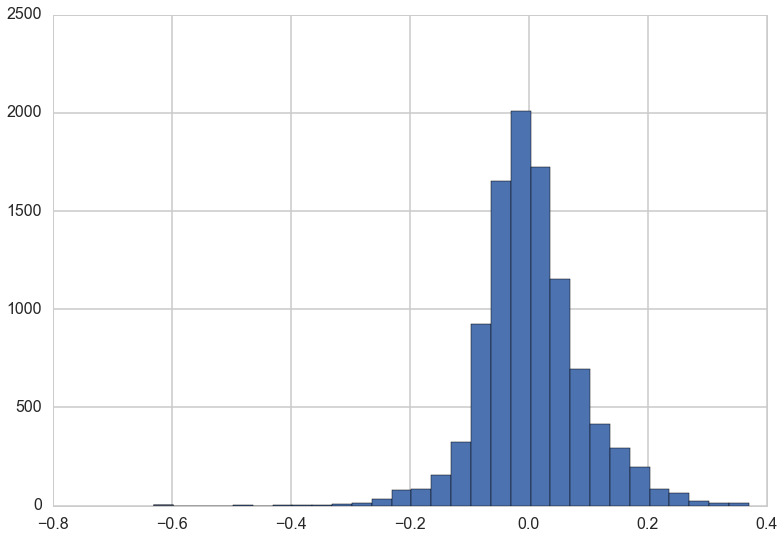

In [56]:
int_df.DIFF.hist(bins=30)

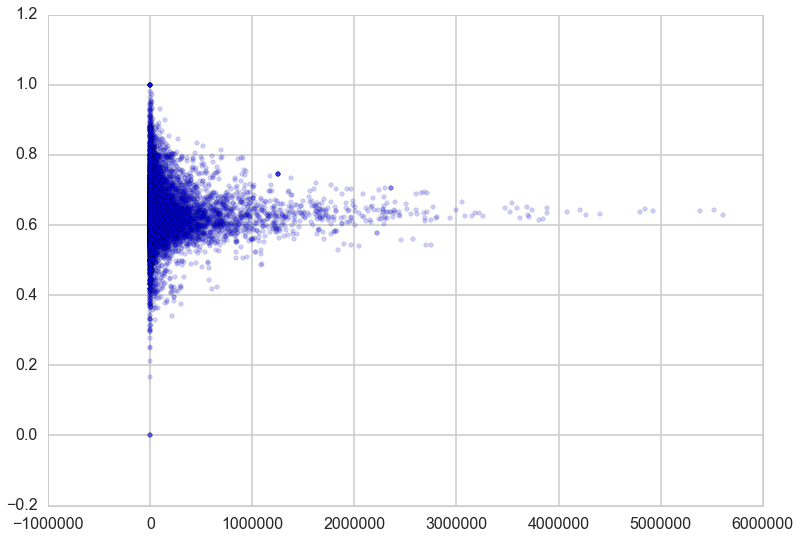

In [62]:
plt.scatter(int_df.COUNT, int_df.MEAN, alpha=0.2)

## SPARK

In [8]:
import findspark
findspark.init()
print findspark.find()

/usr/local/Cellar/apache-spark/1.5.1/libexec/


In [9]:
import pyspark
conf = (pyspark.SparkConf()
    .setMaster('local')
    .setAppName('pyspark')
    .set("spark.executor.memory", "2g"))
sc = pyspark.SparkContext(conf=conf)

In [10]:
import sys
rdd = sc.parallelize(xrange(10),10)
rdd.map(lambda x: sys.version).collect()

['2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x8

In [5]:
dftouse=df_i[['RESPONSE','PRIMINC','REGION','DIVISION','SERVSETD']]

In [25]:
cols=['RESPONSE','PRIMINC','REGION','DIVISION','SERVSETD','METHUSE','PSOURCE','DETCRIM','NOPRIOR',
          'SUB1','ROUTE1','FREQ1','FRSTUSE1','SUB2','ROUTE2','FREQ2','FRSTUSE2','NUMSUBS','IDU',
          'ALCDRUG','DSMCRIT','PSYPROB','HLTHINS','PRIMPAY']

In [33]:
dftouse.reset_index().to_json('df.json')

In [6]:
del df_i

In [11]:
from pyspark import SQLContext
sqlc = SQLContext(sc)
#READ IN FROM PANDAS DF
spark_df = sqlc.createDataFrame(dftouse)
#del df_i
#spark_df=sqlc.read.json("df.jsonl")

In [12]:
spark_df.show(5)

+--------+-------+------+--------+--------+
|RESPONSE|PRIMINC|REGION|DIVISION|SERVSETD|
+--------+-------+------+--------+--------+
|       1|     21|     2|       4|       4|
|       0|      1|     2|       3|       6|
|       0|     21|     2|       3|       6|
|       1|      3|     2|       4|       6|
|       1|     21|     2|       3|       2|
+--------+-------+------+--------+--------+
only showing top 5 rows



In [47]:
test=spark_df.groupBy('RESPONSE').count().collect()

In [73]:
listest=[]

In [74]:
if listest:
    print "YAY"

In [37]:
sum(test[0])

3119284

In [75]:
def SPARK_interactions(df, cols, var_desc, response='RESPONSE'):
    compare=cols
    int_list=[]
    for var in cols:
        print "VAR1: "+var
        compare=compare[1:]
        for var2 in compare: 
            print "VAR2: "+var2
            for p in var_desc[var].keys():
                for q in var_desc[var2].keys():
                    iter_mask=(df[var]==p) & (df[var2]==q)
                    #int_count=iter_mask.count().collect()
                    #int_mean=df[iter_mask].groupBy().avg(response).collect()
                    all_counts=df[iter_mask].groupBy(response).count().collect()
                    if all_counts:
                        try:
                            int_count=all_counts[0][1]+all_counts[1][1]
                            int_mean=all_counts[1][1]/int_count
                        except LookupError:
                            int_count=all_counts[0][1]
                            if all_counts[0][0]==0:
                                int_mean=0
                            else:
                                int_mean=1
                    else:
                        int_count=np.nan
                        int_mean=np.nan
                        
                    int_list.append([var, var2, p, q, int_mean, int_count])
            print "FINISHED VAR2 "+ var2
        print 'FINISHED VAR1:'+ var
            
    int_df=pd.DataFrame(data=interactions, columns=['VAR1','VAR2','VAL1','VAL2', 'MEAN', 'COUNT'])
    
    return int_df

In [71]:
test_vars=['REGION','DIVISION','SERVSETD']

In [ ]:
int_df=SPARK_interactions(spark_df,test_vars,var_desc)

VAR1: REGION
VAR2: DIVISION
FINISHED VAR2 DIVISION

In [ ]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)